This notebook shows how to design a transmon pocket (single pad design) in qiskit metal. The notebook only need **TransmonPocket_Single** function from a relative path '../../resources'.

In [1]:
%reload_ext autoreload
%autoreload 2

In [12]:
#This imports the necessary path to draw the single pad transmon design. 
import sys
sys.path.append('Customized_Components')
from rounded_single_pad import Round_TransmonPocket_Single as transmon
import Transmon_property as trans_p
import Transmon_specifications as jj

import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning)

In [3]:
import os
import shutil
import time

In [4]:
import numpy as np
import astropy.units as u
import astropy.constants as c

import pandas as pd
import matplotlib.pyplot as plt

# %matplotlib inline

In [5]:
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, Headings

from qiskit_metal.qlibrary.couplers.coupled_line_tee import CoupledLineTee
# from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
# from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround
from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
# from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight

from qiskit_metal.analyses.quantization import LOManalysis
from qiskit_metal.analyses.quantization import EPRanalysis

# from qiskit_metal.toolbox_metal.parsing import *

In [6]:
# from qiskit_metal.qlibrary.terminations.short_to_ground import ShortToGround
# from qiskit_metal.qlibrary.terminations.open_to_ground import OpenToGround


In [7]:
# pd.read_csv("Frequencies from metal pad size.csv",).plot(x= 'Pad_len (mm)', y = 'EPR Frequency (GHz)')
# plt.ylabel('Frequency (GHz)')
# plt.show()

The target frequency is around 4.2GHz. To get this frequency, we need the pad size to be around 0.275mm.

## Global variables

In [6]:
phi0 = c.h/2/c.e.si
T = 30*u.mK
epsilon_r = 11.45

In [7]:
design = designs.DesignPlanar({}, True)
design.chips.main.size['size_x'] = '20 mm'
design.chips.main.size['size_y'] = '10 mm'

design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '9 um'

design.variables['trace_width'] = '10 um'
design.variables['trace_gap'] = '7 um'

design.variables['pad_buffer_radius'] = '30 um'
design.variables['buffer_resolution'] = '10'
design.variables['connection_pad_buffer_radius'] = '2 um'
# design.chips['main']['material'] = 'Silicon'

gui = MetalGUI(design)

11:14AM 28s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  WARNING: Populating font family aliases took 145 ms. Replace uses of missing font family "Courier" with one that exists to avoid this cost. 



Component-specific variables

In [8]:


qb_options = dict(
pad_pocket_distance_top = '40um',
connection_pads = dict(
    a = dict(loc_W  = 0, 
            loc_H =  1, 
            pad_gap = '15um',
            pad_height = '15um',
            pad_width = '80um',
            pad_cpw_extent =  '10um',
            pocket_rise = '0um',
            cpw_extend = '0um',
            pocket_extent = '0um',)))

TQ_options = dict(prime_width = design.variables['cpw_width'],
               prime_gap = design.variables['cpw_gap'],
               second_width = design.variables['trace_width'],
               second_gap = design.variables['trace_gap'],
               down_length = '60um',
               coupling_space = '5um',
               open_termination=False,
               hfss_wire_bonds = False,
               q3d_wire_bonds = False)

CPW_options = Dict(trace_width = design.variables['trace_width'],
               trace_gap  = design.variables['trace_gap'],
        total_length='5 mm',
        hfss_wire_bonds = True,
        q3d_wire_bonds = True,
        fillet='30 um',
        lead = dict(start_straight='20um', end_straight = '50um'),
        pin_inputs=Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end')), )

pin_inputs = Dict(
            start_pin=Dict(component='Q1', pin='a'),
            end_pin=Dict(component='TQ1', pin='second_end'))

trans_options = Dict(hfss_wire_bonds = True,
                     q3d_wirebonds = True,
               pin_inputs=Dict(
                 start_pin=Dict(
                     component='TQ1',
                     pin='prime_start'),
                 end_pin=Dict(
                     component='TQ2',
                     pin='prime_end')))


## Design

Single pad transmon

In [9]:
design.delete_all_components()

In [13]:
design.overwrite_enabled = True

size = 0.25*u.mm
gap = 30*u.um
size = size.to(u.um)
pocket_width = size+2*gap


op = Dict(
    pos_x = '0',
    pad_height = '{}um'.format(size.value),
    pos_y = '0',
    pad_width = '{}'.format(size),
    pocket_width = '{}'.format(pocket_width), 
    **qb_options)

q1 = transmon(design,'Q1',options = op)

gui.rebuild()
gui.zoom_on_components(['Q1'])


In [14]:
op = Dict(
    pos_x = '1mm',
    pad_height = '{}um'.format(size.value),
    pos_y = '0',
    pad_width = '{}'.format(size),
    pocket_width = '{}'.format(pocket_width), 
    **qb_options)

q2 = transmon(design,'Q2',options = op)

gui.rebuild()
gui.zoom_on_components(['Q2'])

Coupled Line Tee

In [18]:
TQ_options['down_length'] = '40 um'
TQ1 = CoupledLineTee(design, 'TQ1', options=dict(pos_x='-0.1 mm',
                                             pos_y='0.5 mm',
                                             mirror = True,
                                             coupling_length='120 um', **TQ_options))
TQ1.options['open_termination'] = False

gui.rebuild()
gui.autoscale()

  return lib.buffer(

  return lib.buffer(



In [19]:
TQ2 = CoupledLineTee(design, 'TQ2', options=dict(pos_x='0.9 mm',
                                             pos_y='0.5 mm',
                                             mirror = True,
                                             coupling_length='120 um', **TQ_options))
TQ2.options['open_termination'] = False

gui.rebuild()
gui.autoscale()

  return lib.buffer(

  return lib.buffer(



In [27]:
q1.name[-1:]

'1'

Function that constructs CPW

In [28]:
def Construct_CPW(q,TQ,pad_size, offset, extend, Lj, Cj, TQx,TQy, small, TQ_mir, buffer = 150*u.um):
    gap1 = 0.056
    gap = 30*u.um
    size = pad_size.to(u.um)
    pocket_width = size+2*gap
    design.delete_component('cpw_1')
    coupling_len = extend
    q.options['pad_height'] = '{}'.format(size)
    q.options['pad_width'] = '{}'.format(size)
    q.options['pocket_width'] = '{}'.format(pocket_width)
    q.options['connection_pads']['a']['pad_width'] = '{}'.format(coupling_len)
    q.options.hfss_inductance = Lj
    q.options.q3d_inductance =  Lj
    q.options.hfss_capacitance = Cj
    q.options.q3d_capacitance =  Cj



    eig_all.sim.renderer.options['Lj'] = Lj
    eig_all.sim.renderer.options['Cj'] = Cj

    eig_all.sim.setup.vars = Dict(Lj1= Lj, Cj1= Cj)    
    gui.rebuild()
    

    anchors = trans_p.anchor_CPW_round(q,buffer, gap1, 2, small = small, last_offset = offset)
    design.delete_component('cpw_1')
    gui.rebuild()
    TQ.options.pos_x = TQx
    TQ.options.pos_y = TQy
    TQ.options.mirror = TQ_mir
    gui.rebuild()
    
    pin_inputs = Dict(
                start_pin=Dict(component=q.name, pin='a'),
                end_pin=Dict(component=TQ.name, pin='second_end'))

    CPW_options['pin_inputs'] = pin_inputs

    qa = RouteMixed(design, 'cpw_'+q.name[-1:], options = Dict(anchors = anchors, **CPW_options))

    gui.rebuild()

    return qa

    
    # length = trans_p.find_total_len(qa, q1, TQ1, count_extend=False)
    # return (trans_p.find_actual_frequency(length, cpw_pin_width, cpw_gap), length)

Import the file that contains optimal qubit-CPW specs

In [40]:
data = pd.read_csv('data/educated_guess_0402.csv')

In [41]:
data

,Unnamed: 0,Target_qb_Freq(GHz),Sizes (um),Ljs,Buffers (um),Offsets (mm),TQx,TQy,Small,TQ_mir,CPW_freq_predict(GHz),Ljs (nH)
0,0,4.0,250,13nH,188,0.000,-0.1mm,0.5mm,False,True,6.407373,13
1,1,4.2,235,13nH,184,0.000,-0.1mm,0.5mm,False,True,6.608273,13
2,2,4.4,208,13nH,193,0.000,-0.1mm,0.5mm,False,True,6.800850,13
3,3,4.6,187,13nH,205,0.000,-0.232mm,0.5mm,False,True,7.065522,13
4,4,4.8,223,10nH,210,0.055,0.03mm,0.5mm,True,False,7.200419,10
5,5,5.0,214,10nH,210,0.055,0.09mm,0.5mm,True,False,7.407967,10
6,6,5.2,235,8nH,210,0.042,0.3425mm,0.46mm,True,False,7.600704,8
7,7,5.4,225,8nH,210,0.065,0.3375mm,0.46mm,True,False,7.807242,8
8,8,5.6,206,8nH,210,0.055,0.328mm,0.46mm,True,False,8.000022,8
9,9,5.8,193,8nH,210,0.064,0.3215mm,0.46mm,True,False,8.206983,8


In [42]:
index = data.keys()

In [43]:
index

Index(['Unnamed: 0', 'Target_qb_Freq(GHz)', 'Sizes (um)', 'Ljs',
       'Buffers (um)', 'Offsets (mm)', 'TQx', 'TQy', 'Small', 'TQ_mir',
       'CPW_freq_predict(GHz)', 'Ljs (nH)'],
      dtype='object')

In [44]:
freqs = data['Target_qb_Freq(GHz)'].values
sizes = list(data[index[2]].values)
Ljs = list((data[index[3]].values).astype(str))
buffers = list((data[index[4]].values))
offsets = list(data[index[5]].values)
coupling_space = np.array([])
TQx = list((data[index[6]].values).astype(str))
TQy = list((data[index[7]].values).astype(str))
small = list(data[index[8]].values)
TQ_mir = list((data[index[9]].values))
cpw_freq_predict = list(data[index[10]].values)

['0.5mm',
 '0.5mm',
 '0.5mm',
 '0.5mm',
 '0.5mm',
 '0.5mm',
 '0.46mm',
 '0.46mm',
 '0.46mm',
 '0.46mm']

# Simulation of Couplings

Import Qiskit Packages

In [ ]:
from qiskit_metal.analyses.quantization import LOManalysis
from qiskit_metal.analyses.quantization import EPRanalysis

Set the right path for Ansys Screenshots

In [ ]:
day = '0403'
time = '1130'
original = r'C:\Users\slab\Desktop\Wendy-qiskit-code\ansys.png'
path = r'C:\Users\slab\Desktop\Wendy-qiskit-code\Ansys_screenshoots\Simulation'+day+trys

In [ ]:
components  = ['Q1','cpw_1','TQ1','Q2','TQ2','cpw_2','cpw_mid']
nmode = 4
datas = pd.DataFrame()

# Two Qubit design

In [17]:
design.delete_all_components()

## Draw

### Transmission Line

In [11]:

# TQ_options['down_length'] = '40 um'

# TQ1 = CoupledLineTee(design, 'TQ1', options=dict(pos_x='-0.23 mm',
#                                              pos_y='0.5 mm', 
#                                              mirror = True,
#                                              coupling_length='120 um', **TQ_options))

# TQ2 = CoupledLineTee(design, 'TQ2', options=dict(pos_x='0.43 mm',
#                                              pos_y='0.5 mm',
#                                              mirror = True,
                                            #  coupling_length='120 um', **TQ_options))

trans_options['pin_inputs']['start_pin']['component'] = 'TQ1'
trans_options['pin_inputs']['start_pin']['pin'] = 'prime_end'
trans_options['pin_inputs']['end_pin']['component'] = 'TQ2'
trans_options['pin_inputs']['end_pin']['pin'] = 'prime_start'
middle = RouteStraight(design, 'CPW_mid', trans_options)

# wb_left = LaunchpadWirebond(design,'wb_left', options = Dict(pos_x = '-0.6mm',pos_y = '0.5mm'))
# wb_left = LaunchpadWirebond(design,'wb_right', options = Dict(pos_x = '10mm',pos_y = '0.5mm',orientation = '180'))

# trans_options['pin_inputs']['start_pin']['component'] = 'wb_left'
# trans_options['pin_inputs']['start_pin']['pin'] = 'tie'
# trans_options['pin_inputs']['end_pin']['component'] = 'TQ1'
# trans_options['pin_inputs']['end_pin']['pin'] = 'prime_start'

# left = RouteStraight(design,'CPW_left', trans_options)

# trans_options['pin_inputs']['start_pin']['component'] = 'wb_right'
# trans_options['pin_inputs']['start_pin']['pin'] = 'tie'
# trans_options['pin_inputs']['end_pin']['component'] = 'TQ2'
# trans_options['pin_inputs']['end_pin']['pin'] = 'prime_end'

# right = RouteStraight(design,'CPW_right', trans_options)


gui.rebuild()
gui.zoom_on_components(['TQ1','TQ2'])

### Qubit 1

In [51]:
freqs_size = {}
freqs_size['4GHz'] = size1
freqs_size['4.2GHz'] = size2


{'4GHz': <Quantity 250. um>, '4.2GHz': <Quantity 230. um>}

In [61]:
size1 = 250*u.um
size2 = 200*u.um
gap = 30*u.um
size1 = size1.to(u.um)
pocket_width1 = size1+2*gap
pocket_width2 = size2+2*gap


q1 = TransmonPocket_Single(design,'Q1', 
                           options = Dict(pocket_width = '{}'.format(pocket_width1),
                                          pad_width = '{}'.format(size1), 
                           pad_height = '{}'.format(size1),
                           pos_x = '0', pox_y = '0', **qb_options))

anchor = trans_p.anchor_CPW(q1, 150*u.um,0.05,2,last_offset = 0.4)
# last = anchor[len(anchor)-1]
# first = anchor[0]
# anchor[len(anchor)-1] = np.array([first[0]-0.05,last[1]])

design.delete_component('cpw1')
pin_inputs['start_pin']['component'] = 'Q1'
pin_inputs['start_pin']['pin'] = 'a'
pin_inputs['end_pin']['component'] = 'TQ1'
pin_inputs['end_pin']['pin'] = 'second_end'
CPW_options['pin_inputs'] = pin_inputs
op = Dict(anchors = anchor, **CPW_options)


cpw1 = RouteMixed(design, 'cpw_1', op)

gui.rebuild()
gui.autoscale()

gui.zoom_on_components(['Q1', 'cpw_1','TQ1'])

09:10PM 19s INFO [delete_component]: Called delete_component cpw1, but such a component is not in the design cache dictionary of components.


Calculate CPW1 length and analytical frequency

In [62]:
len1 = trans_p.find_total_len(cpw1, q1,TQ1,count_extend=True)
print(len1)
trans_p.find_actual_frequency(len1, 15*u.um, 9*u.um)

4.377362787842316 mm


<Quantity 6.93828497 GHz>

### Qubit 2

In [64]:
x = 0.4/size1*size2
print(x)

0.32


In [66]:
q2 = TransmonPocket_Single(design,'Q2',
                           options = Dict(pocket_width = '{}'.format(pocket_width2),
                                          pad_width = '{}'.format(size2), 
                           pad_height = '{}'.format(size2),
                           pos_x = '0.65', pox_y = '0', **qb_options))


anchor = trans_p.anchor_CPW(q2, 150*u.um,0.05,2,last_offset = x.value)
# last = anchor[len(anchor)-1]
# first = anchor[0]
# anchor[len(anchor)-1] = np.array([first[0]-0.05,last[1]])

design.delete_component('cpw2')
pin_inputs['start_pin']['component'] = 'Q2'
pin_inputs['end_pin']['component'] = 'TQ2'
CPW_options['pin_inputs'] = pin_inputs
op = Dict(anchors = anchor, **CPW_options)


cpw2 = RouteMixed(design, 'cpw_2', op)

gui.rebuild()
gui.zoom_on_components(['Q2', 'cpw_2','TQ2'])

09:10PM 48s INFO [delete_component]: Called delete_component cpw2, but such a component is not in the design cache dictionary of components.


Calculate CPW2 length and analytical frequency

In [67]:
len2 = trans_p.find_total_len(cpw2, q2,TQ1,count_extend=True)
print(len2)
trans_p.find_actual_frequency(len2, 10*u.um, 7*u.um)

4.127362787842316 mm


<Quantity 7.38495032 GHz>

## Simulate

In [16]:
qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'



q1.options.hfss_inductance = '13 nH'
q2.options.hfss_inductance = '13 nH'
gui.rebuild()  # line needed to propagate the updates from the qubit instance into the junction design table
gui.autoscale()

In [17]:
cs = LOManalysis(design, "q3d")
cs.sim.setup.min_passes  = 10
cs.sim.setup.max_passes = 30
cs.sim.setup.freq_ghz = 4

In [21]:
eig_qb = EPRanalysis(design, 'hfss')
    
eig_qb.sim.setup.max_passes = 15
eig_qb.sim.setup.max_delta_f = 0.2
eig_qb.sim.setup.n_modes = 2
# eig_qb.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF')
# eig_qb.sim.setup.vars = Dict(Lj2= '13 nH', Cj2= '0 fF')

eig_qb.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_qb.sim.renderer.options['y_buffer_width_mm'] = 0.5

### Q1 CPW1

In [64]:
TQ1.options['open_termination'] = True
gui.rebuild()

cs.sim.run(components=['Q1','cpw_1','TQ1'])

INFO 09:31PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 09:31PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 09:31PM [analyze]: Analyzing setup Setup
INFO 09:34PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpfa4c939q.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 09:34PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpvsnyot1t.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 09:34PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpz30s0k91.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 2, False
INFO 09:34PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpok7nfc6a.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, 

In [65]:
cs.sim.capacitance_matrix

,a_connector_pad_Q1,g_wb,pad_top_Q1
a_connector_pad_Q1,665.27129,-650.02031,-13.49760
g_wb,-650.02031,796.97349,-93.27465
pad_top_Q1,-13.49760,-93.27465,108.72911


In [66]:
TQ1.options['open_termination'] = False
gui.rebuild()

In [67]:
eig_qb.sim.run(name="Transmons_CPW", components=['Q1', 'cpw_1','TQ1'])

INFO 09:34PM [connect_design]: 	Opened active design
	Design:    Transmons_CPW_hfss [Solution type: Eigenmode]
INFO 09:35PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 09:35PM [analyze]: Analyzing setup Setup
09:40PM 39s INFO [get_f_convergence]: Saved convergences to c:\Users\slab\Desktop\Wendy-qiskit-code\hfss_eig_f_convergence.csv


In [68]:
fs = eig_qb.get_frequencies()

Design "Transmons_CPW_hfss" info:
	# eigenmodes    2
	# variations    1
Design "Transmons_CPW_hfss" info:
	# eigenmodes    2
	# variations    1


In [70]:
fs

Freq. (GHz)  Quality Factor
variation mode                             
0         0        4.161082             inf
          1        6.956481             inf

In [74]:
eig_qb.sim.renderer.options['Lj1'] = '13nH'
eig_qb.sim.renderer.options['Cj1'] = '0'

In [76]:
del eig_qb.setup.junctions['jj']

KeyError: 'jj'

In [77]:
qcomps = design.components  # short handle (alias)
qcomps['Q1'].options['hfss_inductance'] = 'Lj1'
qcomps['Q1'].options['hfss_capacitance'] = 'Cj1'
gui.rebuild()  # line needed to propagate the updates from the qubit instance into the junction design table
gui.autoscale()

In [78]:
eig_qb.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF')

eig_qb.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                Lj_variable='Lj1', Cj_variable='Cj1')
eig_qb.setup.sweep_variable = 'Lj1'
eig_qb.run_epr()

Design "Transmons_CPW_hfss" info:
	# eigenmodes    2
	# variations    1
Design "Transmons_CPW_hfss" info:
	# eigenmodes    2
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 1.35473482138455e-24
        energy_elec_substrate = 1.23156659202961e-24
        EPR of substrate = 90.9%

        energy_mag    = 1.35031174925656e-24
        energy_mag % of energy_elec_all  = 99.7%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.16 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  1.991e-25 1.895e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.25%
	jj1             0.990164  (+)        0.0175976
		(U_tot_cap-U_tot_ind)/mean=0.89%
Calculating Qdielectric_main for mode 0 (0/1)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_0 = 0.9165344172436739

  Mode 1 at 6.96 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.3%  6.774e-25 6.752e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 95.27%
	jj1             0.00326511  (+)        0.000162185
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 1 (1/1)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_1 = 0.9090831449736702


  options=pd.Series(get_instance_vars(self.options)),

WARNING 10:11PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project29\Transmons_CPW_hfss\2023-03-02 22-11-34.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.018009
1    1.024887
dtype: float64

Pm_norm idx =
     jj1
0   True
1  False
*** P (participation matrix, not normlz.)
        jj1
0  0.973041
1  0.003265

*** S (sign-bit matrix)
   s_jj1
0      1
1     -1
*** P (participation matrix, normalized.)
      0.99
    0.0033

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       169     1.86
      1.86  0.00513

*** Chi matrix ND (MHz) 
       185     1.72
      1.72  0.00427

*** Frequencies O1 PT (MHz)
0    3991.256879
1    6955.545502
dtype: float64

*** Frequencies ND (MHz)
0    3983.557710
1    6955.558496
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,13
0,3983.56
1,6955.56


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1
Lj1                    
13  0  185.47  1.72e+00
    1    1.72  4.27e-03

### QB2 CPW2

In [92]:
TQ2.options['open_termination'] = True
gui.rebuild()

cs.sim.run(components=['Q2','cpw_2','TQ2'])

INFO 10:36PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 10:36PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 10:36PM [analyze]: Analyzing setup Setup
INFO 10:39PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpyn2xhb8g.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 10:39PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp6raycjs4.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 10:39PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp7dsxqo3d.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 2, False
INFO 10:39PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp499g9iuz.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, 

In [93]:
c_mat  = cs.sim.capacitance_matrix
c_mat

,a_connector_pad_Q2,g_wb,pad_top_Q2
a_connector_pad_Q2,637.35428,-622.92575,-12.77218
g_wb,-622.92575,759.97001,-84.02489
pad_top_Q2,-12.77218,-84.02489,98.52208


In [145]:
TQ2.options['open_termination'] = False
gui.rebuild()
cs.sim.run(components=['Q2','cpw_2','TQ2'])

INFO 11:25PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 11:25PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 11:25PM [analyze]: Analyzing setup Setup
INFO 11:26PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpzl9cgd0h.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 11:26PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmprqcxowl_.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 1, False
INFO 11:26PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp9g0810ga.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, Maxwell, 2, False
INFO 11:26PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp9tz1s2sv.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 4000000000, 

In [146]:
c_mat  = cs.sim.capacitance_matrix
c_mat

,a_connector_pad_Q2,pad_top_Q2
a_connector_pad_Q2,150.67501,-96.42959
pad_top_Q2,-96.42959,98.20829


In [147]:
cq = -c_mat['a_connector_pad_Q2']['pad_top_Q2']
trans_p.freq_from_cap(cq*u.fF)

(<Quantity 4.29426643e+09 1 / s>,
 (<Quantity 2.69816717e+10 1 / s>, <Quantity 2.0087433e+08 1 / s>))

In [148]:
eig_qb.sim.run(name="Transmons_CPW", components=['Q2', 'cpw_2','TQ2'])

INFO 11:26PM [connect_design]: 	Opened active design
	Design:    Transmons_CPW_hfss [Solution type: Eigenmode]
INFO 11:27PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 11:27PM [analyze]: Analyzing setup Setup
11:34PM 35s INFO [get_f_convergence]: Saved convergences to c:\Users\slab\Desktop\Wendy-qiskit-code\hfss_eig_f_convergence.csv


In [149]:
fs = eig_qb.get_frequencies()

Design "Transmons_CPW_hfss" info:
	# eigenmodes    2
	# variations    1
Design "Transmons_CPW_hfss" info:
	# eigenmodes    2
	# variations    1


In [150]:
fs

Freq. (GHz)  Quality Factor
variation mode                             
0         0        4.377903             inf
          1        7.262958             inf

In [151]:
eig_qb.sim.renderer.options['Lj2'] = '13nH'
eig_qb.sim.renderer.options['Cj2'] = '0'

In [125]:
del eig_qb.setup.junctions['jj']

KeyError: 'jj'

In [152]:
qcomps = design.components  # short handle (alias)
qcomps['Q2'].options['hfss_inductance'] = 'Lj2'
qcomps['Q2'].options['hfss_capacitance'] = 'Cj2'
gui.rebuild()  # line needed to propagate the updates from the qubit instance into the junction design table
gui.autoscale()

In [153]:
eig_qb.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF')

eig_qb.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q2_rect_jj', line='JJ_Lj_Q2_rect_jj_',
                Lj_variable='Lj2', Cj_variable='Cj2')
eig_qb.setup.sweep_variable = 'Lj2'
eig_qb.run_epr()

Design "Transmons_CPW_hfss" info:
	# eigenmodes    2
	# variations    1
Design "Transmons_CPW_hfss" info:
	# eigenmodes    2
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 8.39918589698282e-25
        energy_elec_substrate = 7.63485076691289e-25
        EPR of substrate = 90.9%

        energy_mag    = 8.36919280692545e-25
        energy_mag % of energy_elec_all  = 99.6%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 4.38 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  1.177e-25 1.129e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.07%
	jj1             0.989907  (+)        0.0194742
		(U_tot_cap-U_tot_ind)/mean=0.99%
Calculating Qdielectric_main for mode 0 (0/1)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_0 = 0.9170232940571846

  Mode 1 at 7.26 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.4%    4.2e-25 4.185e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 94.86%
	jj1             0.00357011  (+)        0.000193304
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 1 (1/1)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_1 = 0.9089989030550573


  options=pd.Series(get_instance_vars(self.options)),

WARNING 11:34PM [__init__]: <p>Error: <class 'IndexError'></p>
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project29\Transmons_CPW_hfss\2023-03-02 23-34-37.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.020082
1    1.027290
dtype: float64

Pm_norm idx =
     jj1
0   True
1  False
*** P (participation matrix, not normlz.)
        jj1
0  0.970997
1  0.003569

*** S (sign-bit matrix)
   s_jj1
0     -1
1     -1
*** P (participation matrix, normalized.)
      0.99
    0.0036

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       187     2.24
      2.24  0.00668

*** Chi matrix ND (MHz) 
       206     2.05
      2.05  0.00549

*** Frequencies O1 PT (MHz)
0    4189.856607
1    7261.834077
dtype: float64

*** Frequencies ND (MHz)
0    4180.823575
1    7261.851667
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj2,13
0,4180.82
1,7261.85


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1
Lj2                    
13  0  206.30  2.05e+00
    1    2.05  5.49e-03

# Simulation of 2 QB

In [16]:
components_all = ['Q1','Q2','cpw_1','cpw_2','TQ1','TQ2','CPW_left','CPW_right', 'CPW_mid','wb_left','wb_right']

## Capacitance

In [17]:
c = LOManalysis(design, "q3d")
c.sim.setup.min_passes  = 10
c.sim.setup.max_passes = 30

In [26]:
c.sim.run(components=['Q1','Q2','cpw_1','cpw_2','TQ1','TQ2','wb_left','wb_right','CPW_left','CPW_right', 'CPW_mid'])
c.sim.capacitance_matrix 

c.sim._get_results_from_renderer()
c_mat = c.sim.capacitance_matrix

INFO 02:13PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 02:13PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:13PM [analyze]: Analyzing setup Setup
INFO 02:22PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpk_56s35z.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 02:22PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp1cts2a5v.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 02:22PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpjcqw7cnp.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 02:22PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpwu63eb2s.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

In [27]:
c_mat 

,a_connector_pad_Q1,launch_pad_wb_left,pad_top_Q1,pad_top_Q2
a_connector_pad_Q1,3086.19113,-2607.39624,-107.03128,-97.18904
launch_pad_wb_left,-2607.39624,2614.12895,-0.34996,-0.27353
pad_top_Q1,-107.03128,-0.34996,108.62112,-0.49230
pad_top_Q2,-97.18904,-0.27353,-0.49230,98.53784


In [28]:
C = c_mat.values[2:,2:]

In [29]:
C

array([[108.62112,  -0.4923 ],
       [ -0.4923 ,  98.53784]])

## EPR

In [18]:
eig_all = EPRanalysis(design, 'hfss')

In [30]:


components = ['Q1','Q2','cpw_1','cpw_2','TQ1','TQ2','CPW_mid','CPW_left','CPW_right']
#'wb_left','wb_right','CPW_left','CPW_right', 

hfss = eig_all.sim.renderer

eig_all.sim.renderer.options['Lj'] = '13nH'
eig_all.sim.renderer.options['wb_threshold'] = '72um'

eig_all.sim.setup.max_passes = 5
eig_all.sim.setup.max_delta_f = 0.05
eig_all.sim.setup.n_modes = 4
eig_all.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF',Lj2 = '13nH', Cj2 = '0fF')
eig_all.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_all.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_all.sim.run(name="all_freqs", components=components)#, open_terminations=[('Q1', 'a')])
convergence = pd.read_csv('hfss_eig_f_convergence.csv')

INFO 02:22PM [connect_project]: Connecting to Ansys Desktop API...
INFO 02:22PM [load_ansys_project]: 	Opened Ansys App
INFO 02:22PM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 02:22PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/slab/Documents/Ansoft/
	Project:   Project30
INFO 02:22PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 02:22PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 02:22PM [connect]: 	Connected to project "Project30" and design "Design_q3d" 😀 

INFO 02:22PM [connect_design]: 	Opened active design
	Design:    all_freqs_hfss [Solution type: Eigenmode]
WARNING 02:22PM [connect_setup]: 	No design setup detected.
WARNING 02:22PM [connect_setup]: 	Creating eigenmode default setup.
INFO 02:22PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 02:24PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 02:24PM [a

In [31]:
convergence.dropna()

,Pass [],re(Mode(1)) [g],re(Mode(2)) [g],re(Mode(3)) [g],re(Mode(4)) [g]
0,1,2.561129,2.830780,3.016253,4.913749
1,2,3.084344,3.514951,3.702487,4.976164
2,3,3.470491,3.865356,4.064650,4.999797
3,4,3.718053,3.995875,4.200748,5.591525
4,5,3.802041,4.060443,4.268267,5.850909


In [32]:
del eig_all.setup.junctions['jj']
eig_all.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                Lj_variable='Lj1', Cj_variable='Cj1')
eig_all.setup.junctions.jj2 = Dict(rect='JJ_rect_Lj_Q2_rect_jj', line='JJ_Lj_Q2_rect_jj_',
                Lj_variable='Lj2', Cj_variable='Cj2')
eig_all.setup.sweep_variable = 'Lj1'
eig_all.run_epr()

chi = eig_all.sim.renderer.epr_quantum_analysis.get_chis().to_numpy()[0][0]
freq_EPR= eig_all.sim.renderer.epr_quantum_analysis.get_frequencies().to_numpy()[0][0]

Design "all_freqs_hfss" info:
	# eigenmodes    4
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    4
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 9.31918472205375e-24
        energy_elec_substrate = 8.46798934885033e-24
        EPR of substrate = 90.9%

        energy_mag    = 9.31918235863227e-24
        energy_mag % of energy_elec_all  = 100.0%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 3.80 GHz   [1/4]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%   4.66e-24  4.66e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.54%
	jj1             1.40296e-07  (+)        2.08168e-09


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.54%
	jj2             1.38277e-08  (+)        2.05171e-10
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 0 (0/3)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_0 = 0.9086620344385841

  Mode 1 at 4.06 GHz   [2/4]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  2.336e-24  2.36e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.34%
	jj1             0.988135  (+)        0.0167223


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.34%
	jj2             0.00144428  (+)        2.44417e-05
		(U_tot_cap-U_tot_ind)/mean=0.85%
Calculating Qdielectric_main for mode 1 (1/3)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_1 = 0.9145539468191833

  Mode 2 at 4.27 GHz   [3/4]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%   1.95e-24  1.94e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.16%
	jj1             0.00141928  (+)        2.65402e-05


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.16%
	jj2             0.988311  (+)        0.0184812
		(U_tot_cap-U_tot_ind)/mean=0.93%
Calculating Qdielectric_main for mode 2 (2/3)


  sol = sol.append(self.get_Qdielectric(

  _Om = pd.Series({})



p_dielectric_main_2 = 0.9132796102965752

  Mode 3 at 5.85 GHz   [4/4]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.4%  9.247e-25  9.21e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 96.61%
	jj1             0.00399299  (+)        0.000140306


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 96.61%
	jj2             3.97004e-06  (+)        1.395e-07
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 3 (3/3)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_3 = 0.9402881856171698


  options=pd.Series(get_instance_vars(self.options)),

WARNING 02:28PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project30\all_freqs_hfss\2023-03-03 14-28-11.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization


  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions



Pm_norm=
modes
0    1.330159
1    1.017160
2    1.018930
3    1.015496
dtype: float64

Pm_norm idx =
     jj1    jj2
0  False  False
1   True  False
2  False   True
3  False  False
*** P (participation matrix, not normlz.)
            jj1           jj2
0  1.402964e-07  1.382768e-08
1  9.718591e-01  1.420492e-03
2  1.393489e-03  9.703520e-01
3  3.992427e-03  3.969482e-06

*** S (sign-bit matrix)
   s_jj1  s_jj2
0      1     -1
1      1     -1
2      1      1
3      1      1
*** P (participation matrix, normalized.)
   1.4e-07  1.4e-08
      0.99   0.0014
    0.0014     0.99
     0.004    4e-06

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  2.86e-12 4.26e-05 4.47e-06 2.48e-07
  4.26e-05      160    0.959     1.86
  4.47e-06    0.959      177  0.00471
  2.48e-07     1.86  0.00471  0.00542

*** Chi matrix ND (MHz) 
  1.17e-08-0.000411 5.44e-05 1.78e-06
 -0.000411      176    -8.76     1.58
  5.44e-05    -8.76      204  0.00407
  1.78e-06     1.58  0.0

#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,13
0,3802.04
1,3891.70
2,4082.64
3,5850.01


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0         1         2         3
Lj1                                          
13  0  1.17e-08 -4.11e-04  5.44e-05  1.78e-06
    1 -4.11e-04  1.76e+02 -8.76e+00  1.58e+00
    2  5.44e-05 -8.76e+00  2.04e+02  4.07e-03
    3  1.78e-06  1.58e+00  4.07e-03  3.95e-03

# A huge loop

In [34]:
xs = np.linspace(0.65,14.5,10)
components = ['Q1','Q2','cpw_1','cpw_2','TQ1','TQ2'] 
components_all = ['Q1','Q2','cpw_1','cpw_2','TQ1','TQ2',
                  'CPW_left','CPW_right', 'CPW_mid','wb_left','wb_right']
#we are not simulating the feedline here since it contains a mode close to the qubit frequency

In [17]:
c = LOManalysis(design, "q3d")
c.sim.setup.min_passes  = 2
c.sim.setup.percent_error = 10

In [18]:
eig_all = EPRanalysis(design, 'hfss')
eig_all.sim.setup.min_passes = 5
eig_all.sim.setup.max_delta_f = 0.2

In [19]:
hfss = eig_all.sim.renderer
original = r'C:\Users\slab\Desktop\Wendy-qiskit-code\ansys.png'
path = r'C:\Users\slab\Desktop\Wendy-qiskit-code\Ansys_screenshoots\Simulation_0304'

debugging

In [29]:
# eig_all.clear
# renderer_hfss.clean_active_design()

In [30]:
renderer_hfss = design.renderers.hfss
renderer_q3d = design.renderers.q3d
gds = design.renderers.gds

In [31]:
renderer_q3d.clean_active_design()
renderer_hfss.clean_active_design()

In [32]:
renderer_hfss.clean_active_design()

INFO 04:08PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 04:10PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 04:10PM [analyze]: Analyzing setup Setup
INFO 04:15PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpmqg7zbgi.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 04:15PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpuxgy1qdm.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 04:15PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp2mfzuivf.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 04:15PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpli7kr6g7.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

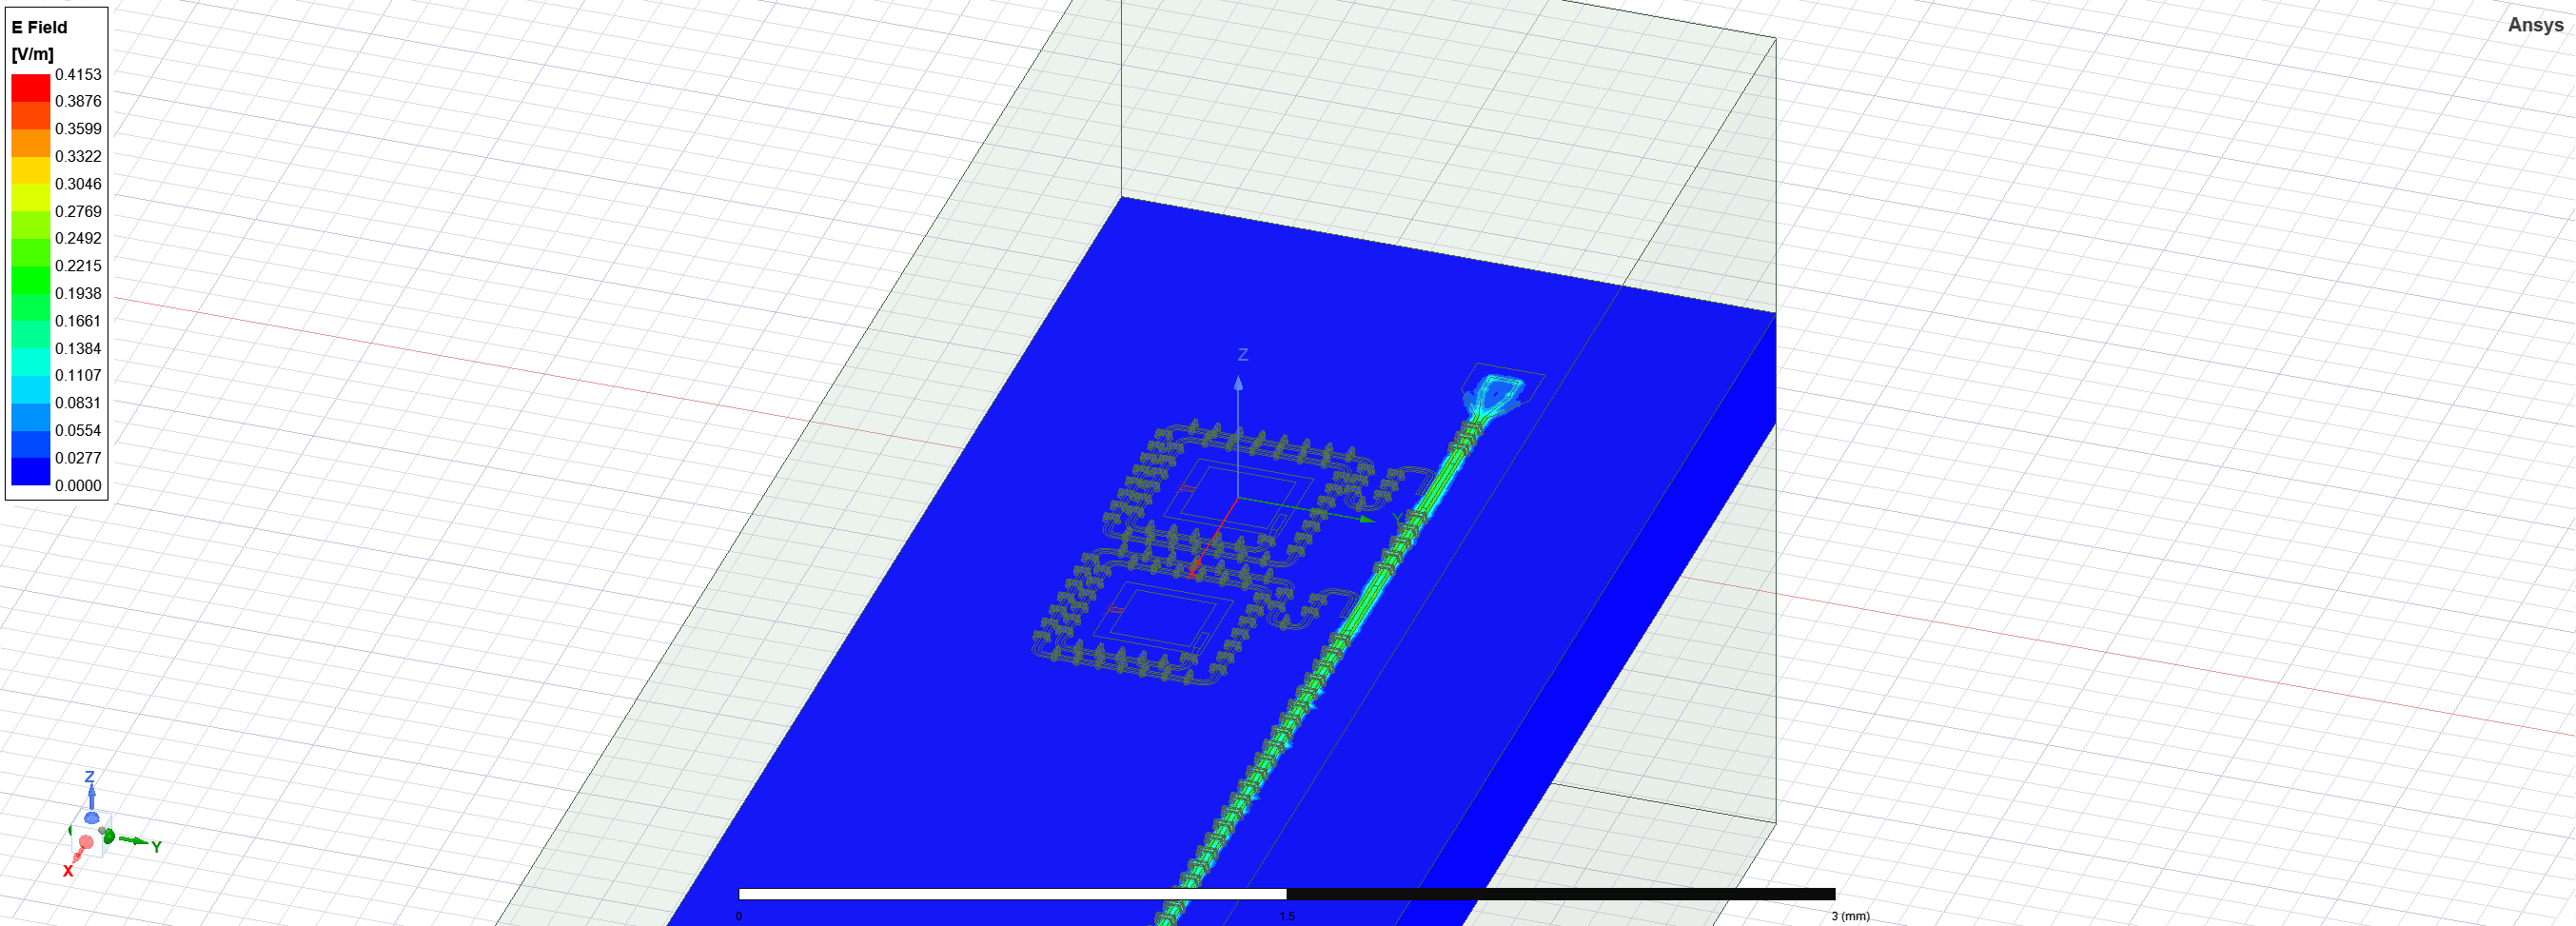

INFO 04:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
04:34PM 34s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


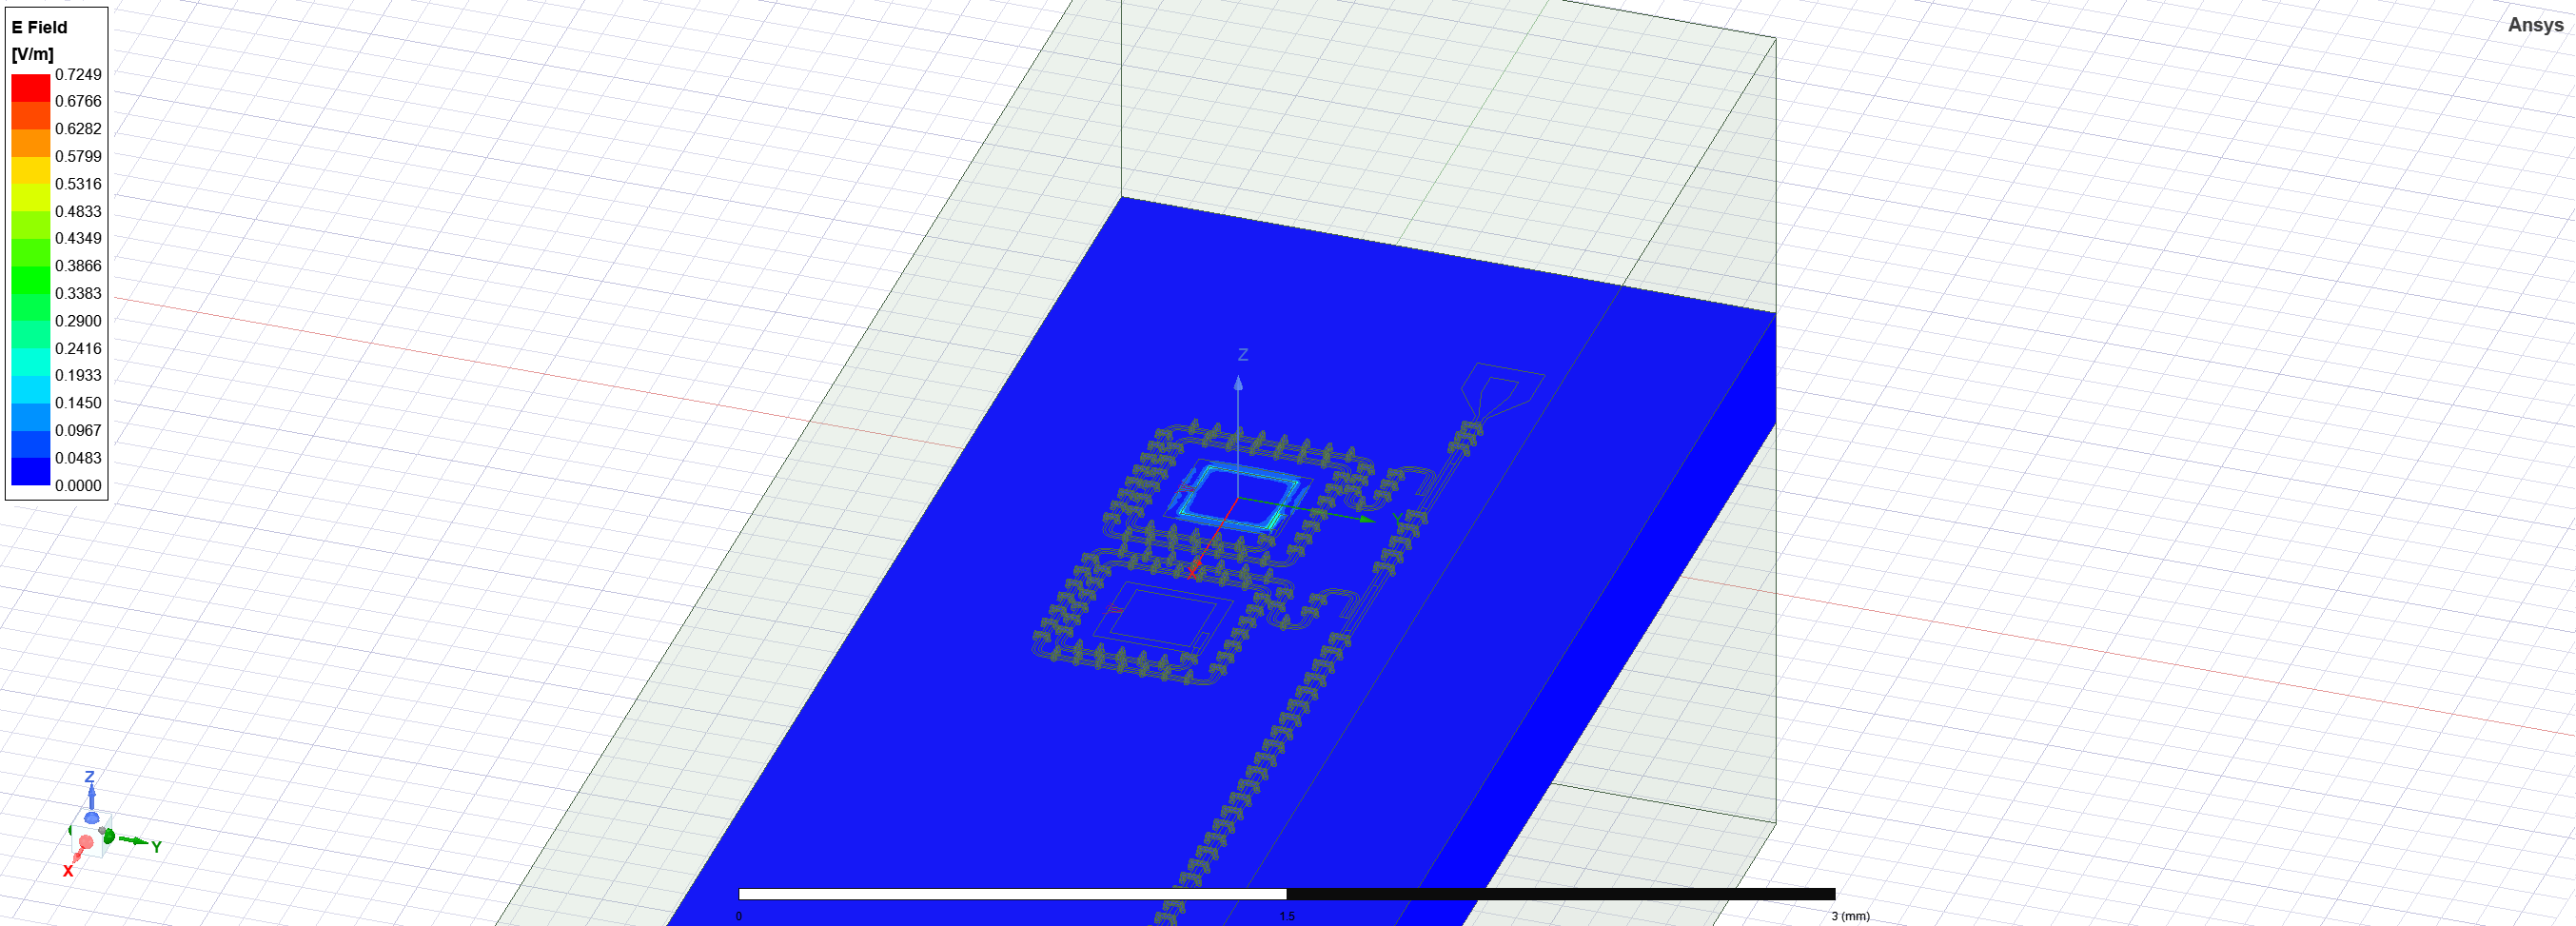

INFO 04:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
04:34PM 43s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


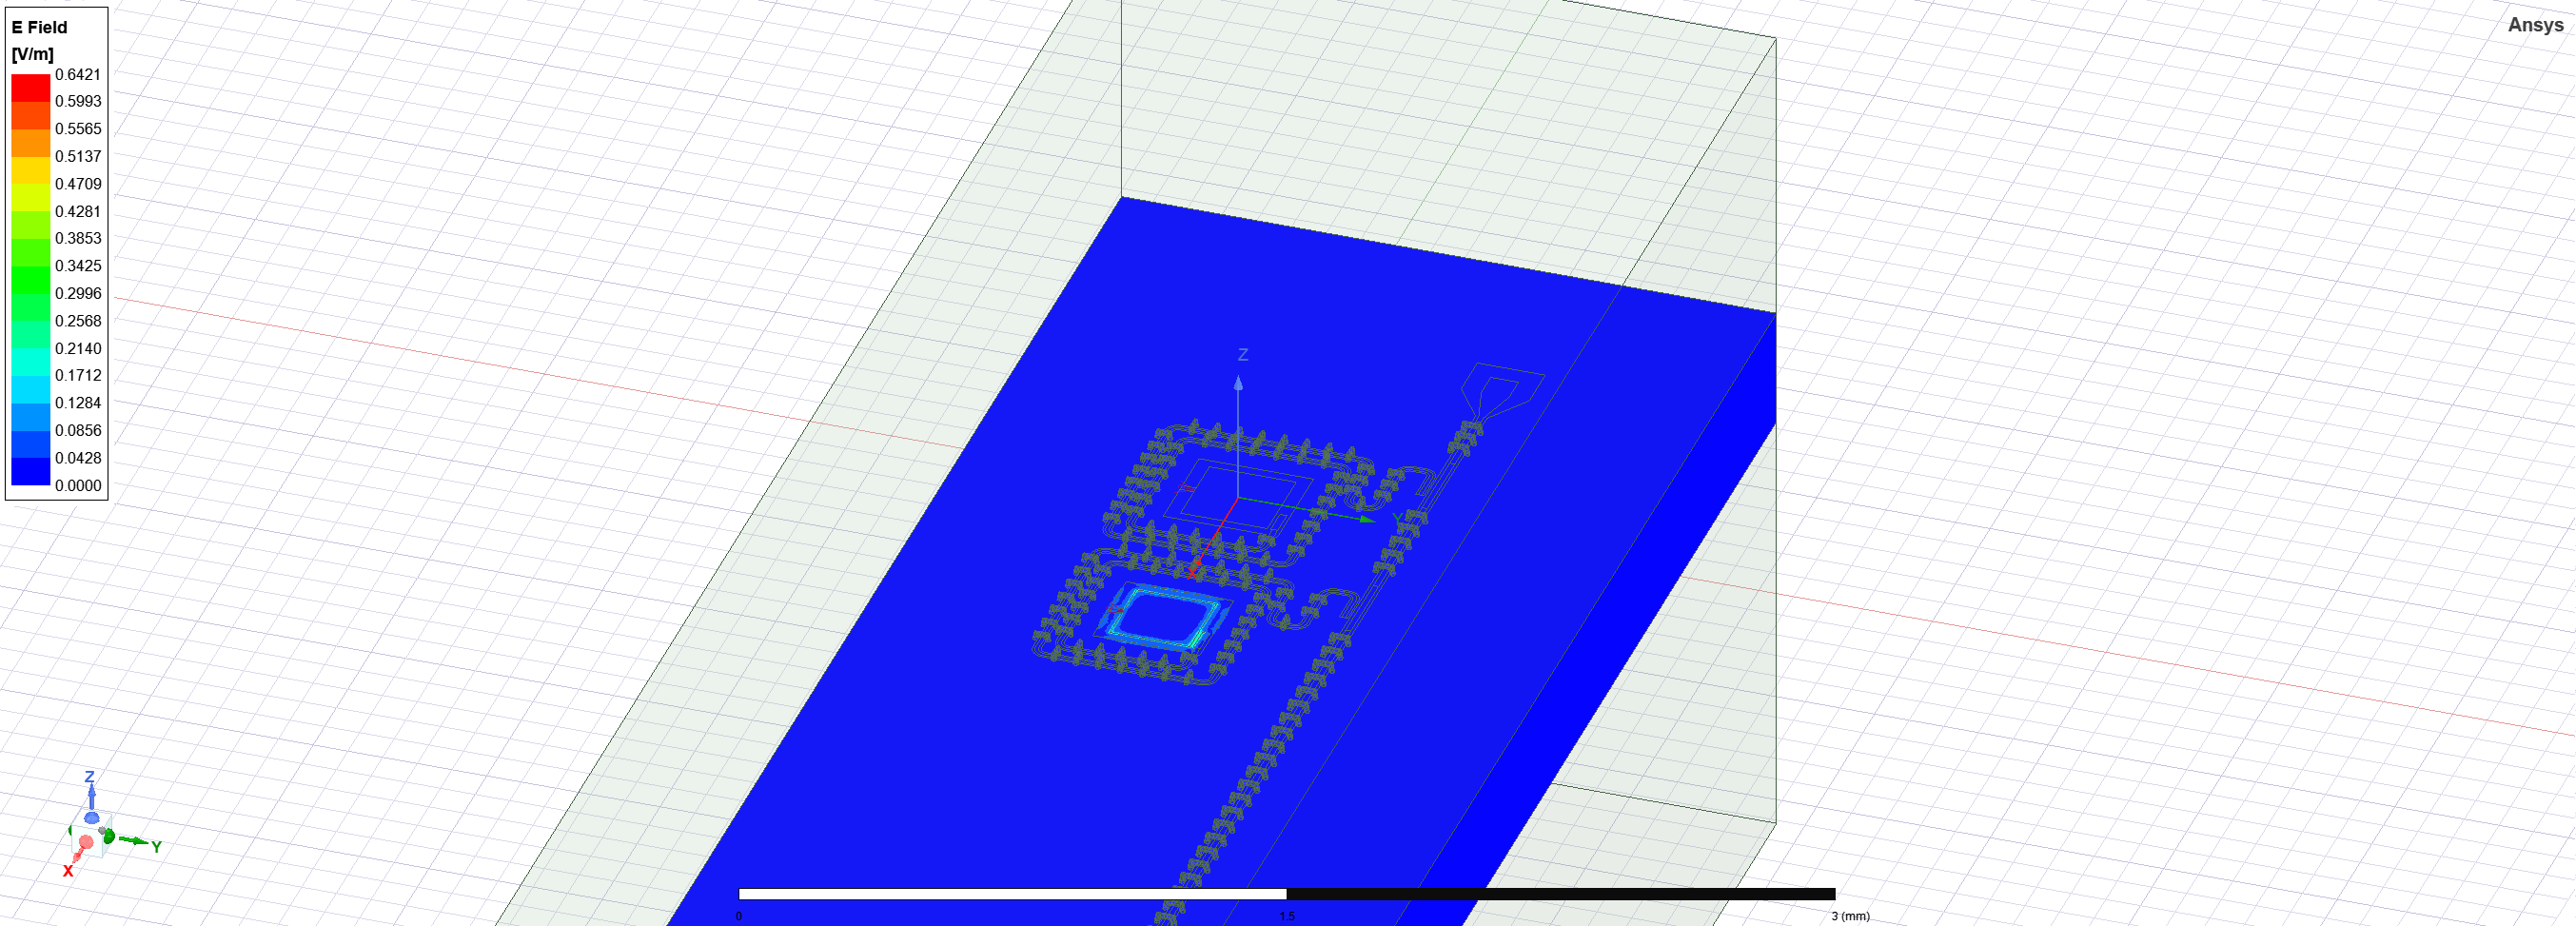

INFO 04:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
04:34PM 53s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


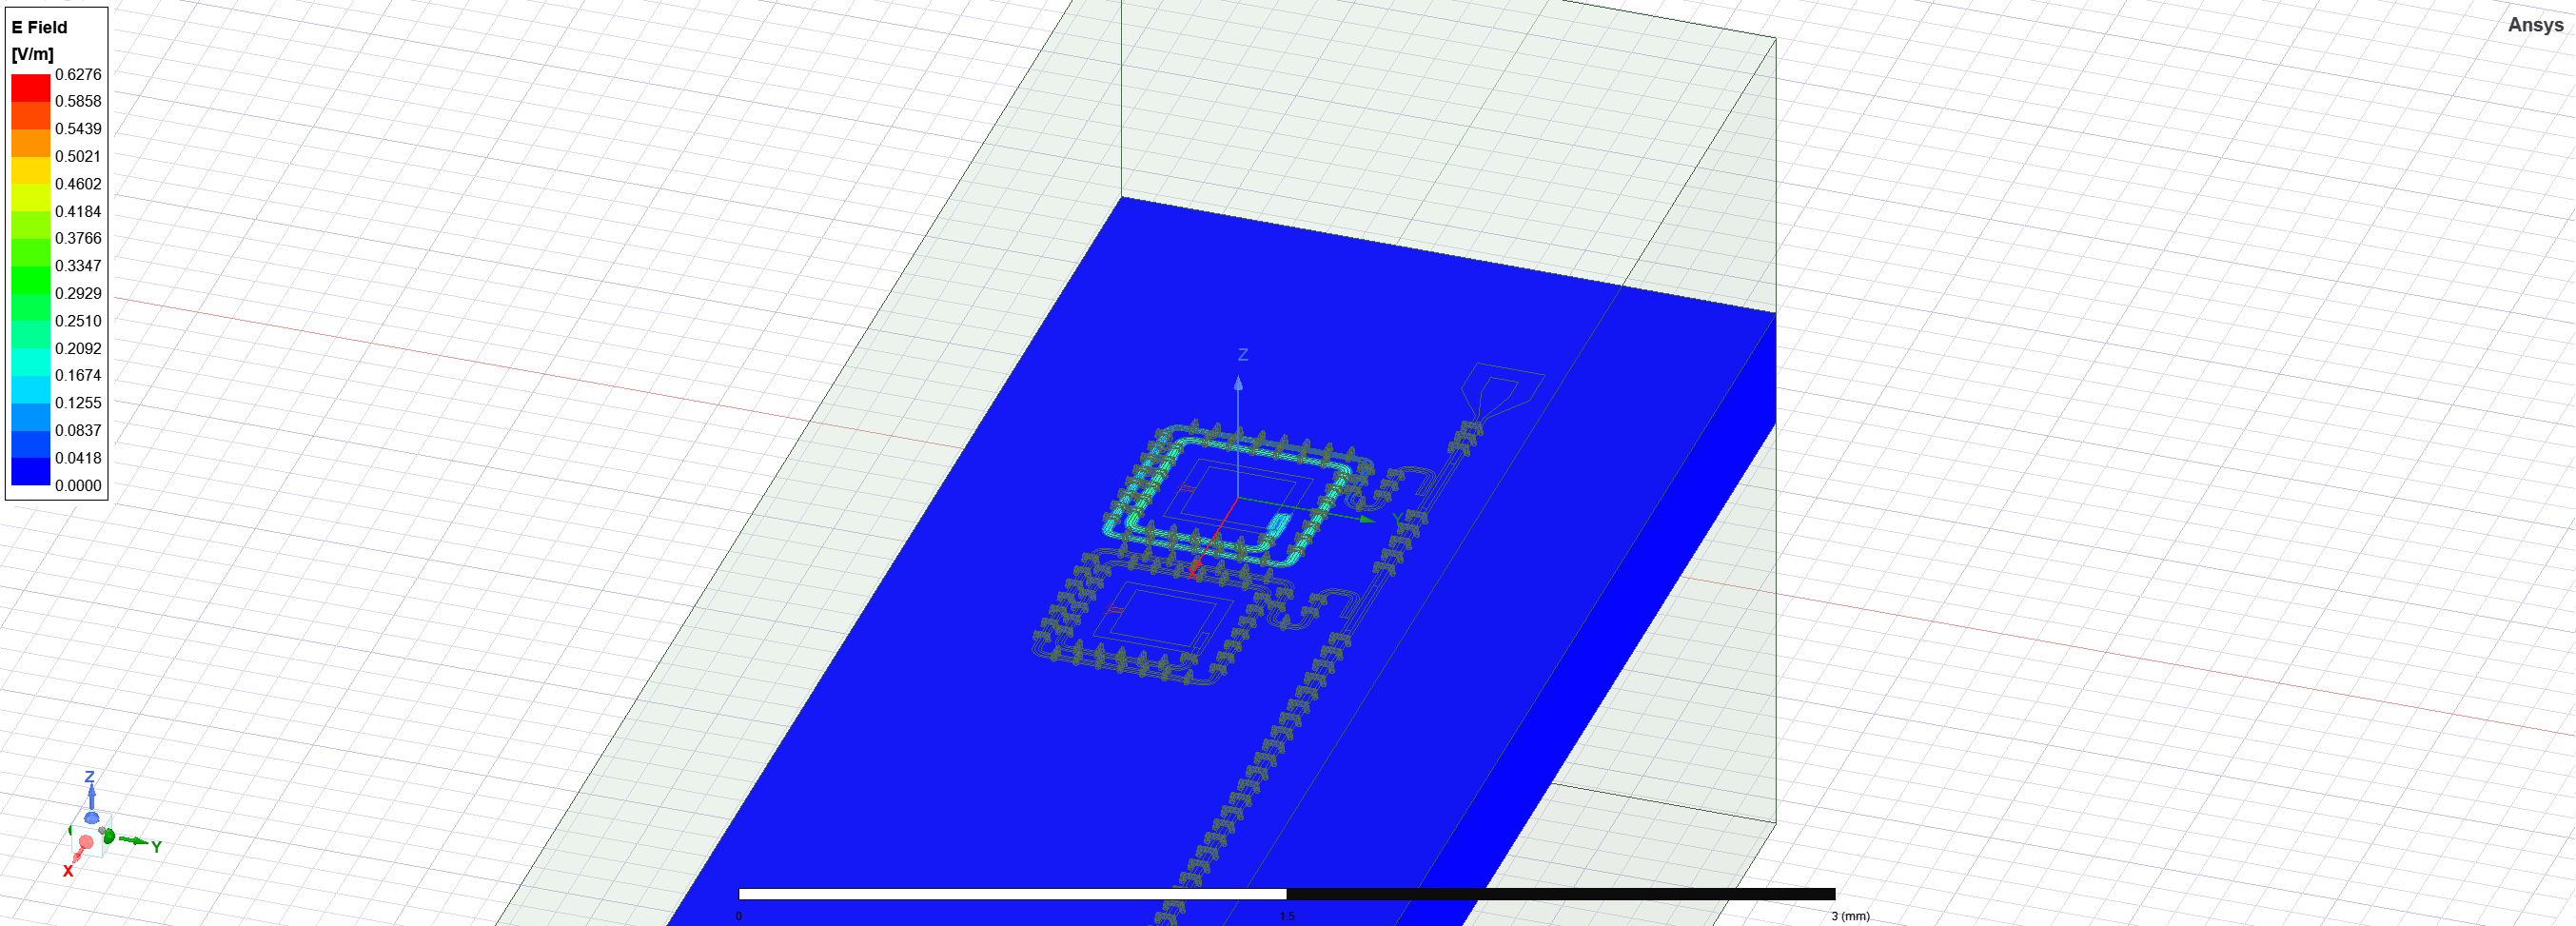

INFO 04:34PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
04:35PM 06s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


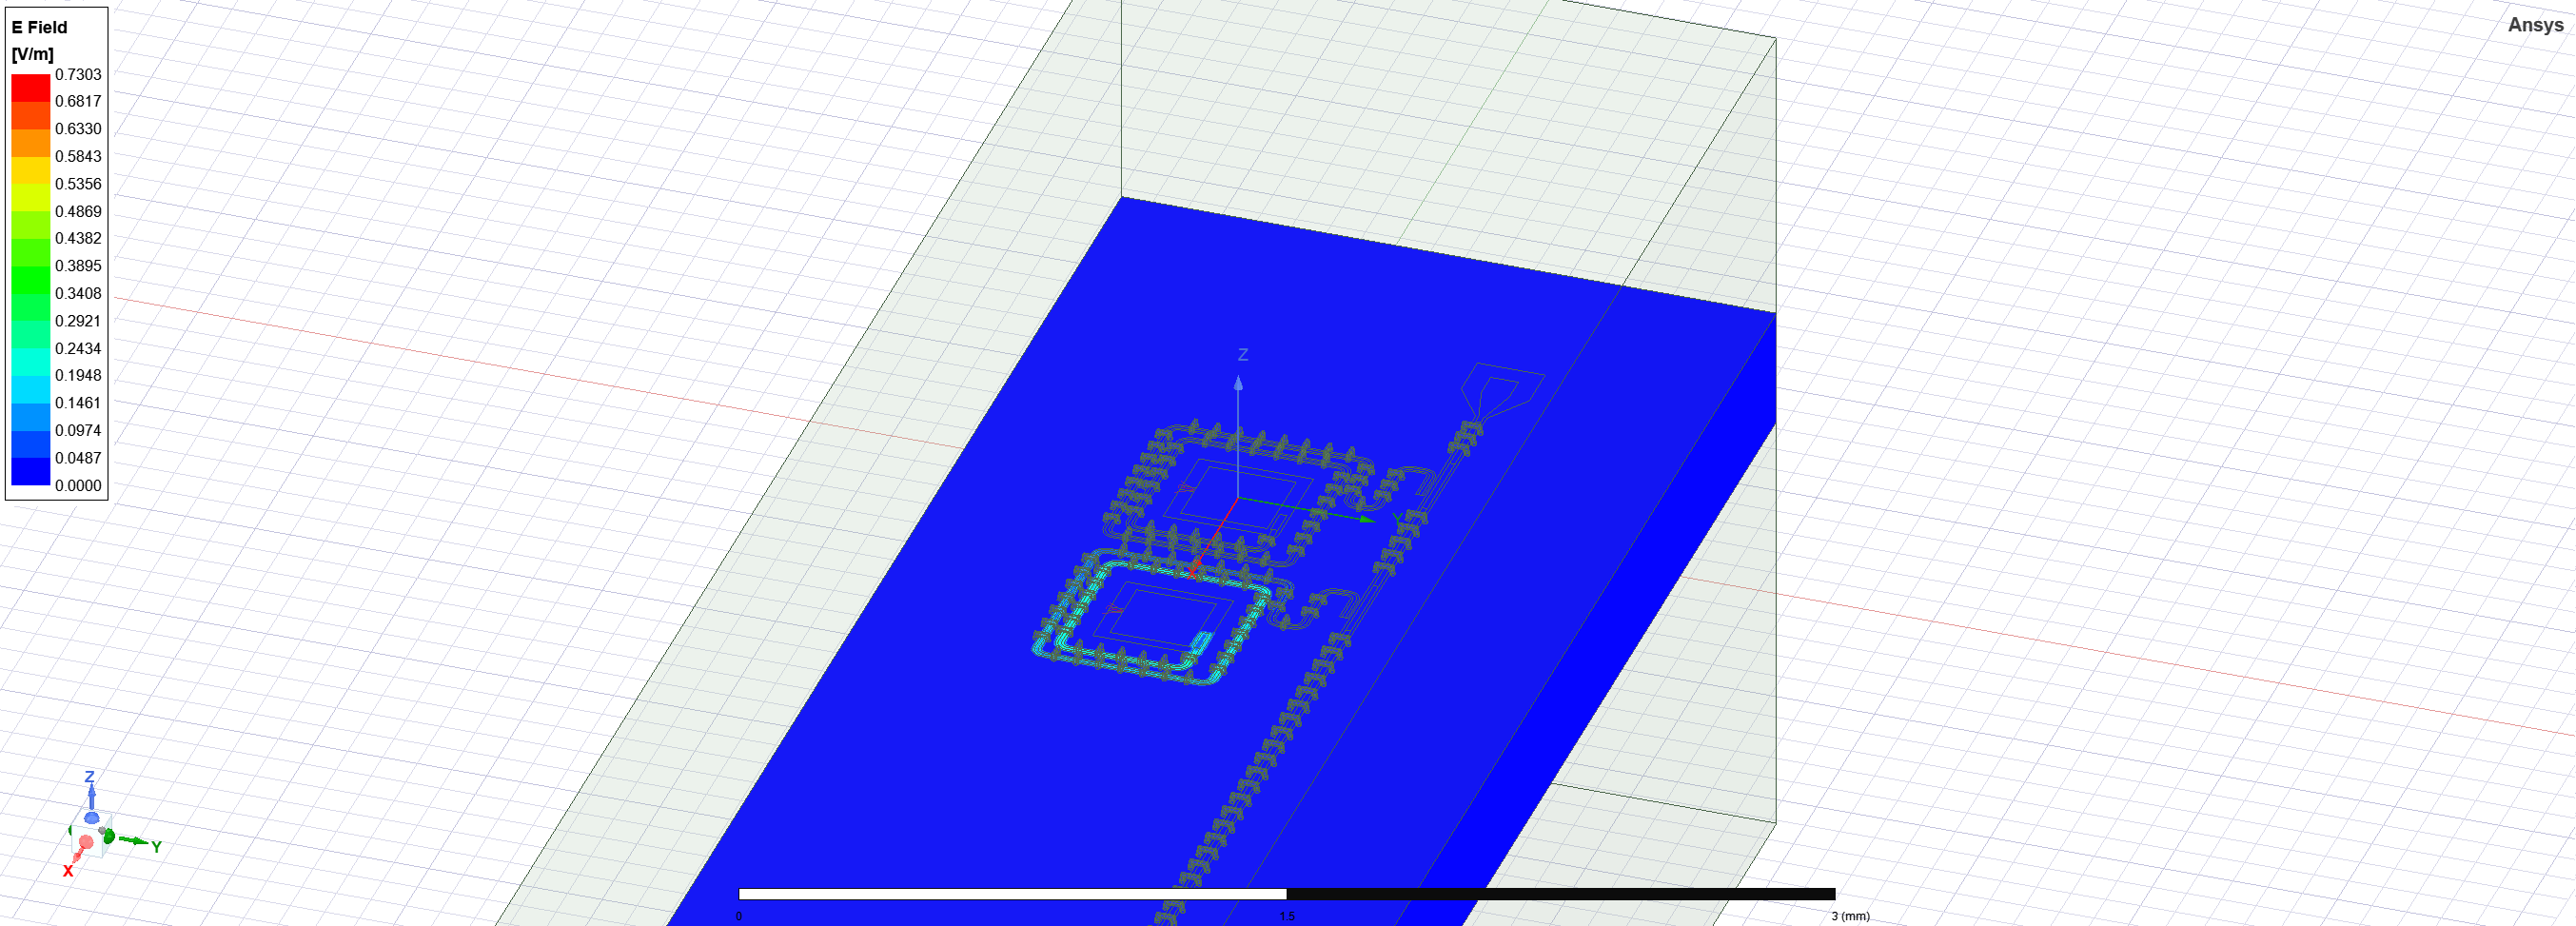

04:35PM 10s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)

04:35PM 10s CRITICAL [_qt_message_handler]: line: 0, func: None(), file: None  CRITICAL: QEventDispatcherWin32::wakeUp: Failed to post a message (Not enough quota is available to process this command.)



In [37]:
datas = pd.DataFrame()
mode = 0
x = xs[0]
data = {}
nmodes = 5

data['Pos1_x(mm)'] = 0
data['Pos2_x(mm)'] = x

design.delete_component('cpw_2')

TQ2.options['pos_x'] = x-0.22
q2.options['pos_x'] = x
anchor = trans_p.anchor_CPW(q2, 150*u.um,0.05,2,last_offset = 0.4)
# cpw2.options['anchors'] = anchor
pin_inputs['start_pin']['component'] = 'Q2'
pin_inputs['end_pin']['component'] = 'TQ2'
CPW_options['pin_inputs'] = pin_inputs
op = Dict(anchors = anchor, **CPW_options)
cpw2 = RouteMixed(design, 'cpw_2', op)

gui.rebuild()

c.sim.setup.min_passes  = 10
c.sim.setup.max_passes = 30
c.sim.run(components=components_all)
c.sim.capacitance_matrix 

c.sim._get_results_from_renderer()
c_mat = c.sim.capacitance_matrix

renderer_q3d.clean_active_design()

c1  = c_mat['a_connector_pad_Q1']['pad_top_Q1']
c2  = c_mat['a_connector_pad_Q1']['pad_top_Q2']
c12  = c_mat['pad_top_Q1']['pad_top_Q2']

data['C_Q1_Q2(fF)'] = c12
data['C_Q1_g(fF)'] = c1
data['C_Q2_g(fF)'] = c2




eig_all.sim.renderer.options['Lj'] = '13nH'
eig_all.sim.renderer.options['Lj1'] = '13nH'
eig_all.sim.renderer.options['Lj2'] = '13nH'
eig_all.sim.renderer.options['wb_threshold'] = '72um'


eig_all.sim.setup.n_modes = nmodes
eig_all.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF',Lj2 = '13nH', Cj2 = '0fF')
eig_all.sim.renderer.options['x_buffer_width_mm'] = 0.5
eig_all.sim.renderer.options['y_buffer_width_mm'] = 0.5
eig_all.sim.run(name="all_freqs", components=components_all)#, open_terminations=[('Q1', 'a')])
convergence = pd.read_csv('hfss_eig_f_convergence.csv')
conv = convergence.dropna()

ind = list(conv.keys())[1:]
for i in range(nmodes):
    freq = conv[ind[(i)]].values[-1]
    data['Freq'+str(i+1)+'(GHz)'] = freq

#save screenshots for future refrences
for i in range(nmodes):
    hfss.modeler._modeler.ShowWindow()
    hfss.set_mode(i+1,'Setup')
    hfss.plot_ansys_fields('main')
    hfss.save_screenshot()
    hfss.clear_fields(['main'])
    
    actual = r'C:\Users\slab\Desktop\Wendy-qiskit-code\s{}_m{}.png'.format(mode,i)

    os.rename(original, actual)
    dest = shutil.move(actual, path)

    

In [40]:
#Run the EPR analysis
del eig_all.setup.junctions['jj']
eig_all.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                Lj_variable='Lj1', Cj_variable='Cj1')
eig_all.setup.junctions.jj2 = Dict(rect='JJ_rect_Lj_Q2_rect_jj', line='JJ_Lj_Q2_rect_jj_',
                Lj_variable='Lj2', Cj_variable='Cj2')
eig_all.setup.sweep_variable = 'Lj1'
eig_all.run_epr()



Design "all_freqs_hfss" info:
	# eigenmodes    5
	# variations    1
Design "all_freqs_hfss" info:
	# eigenmodes    5
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 1.03784792282304e-24
        energy_elec_substrate = 9.39122462814427e-25
        EPR of substrate = 90.5%

        energy_mag    = 1.03414621087791e-24
        energy_mag % of energy_elec_all  = 99.6%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 3.75 GHz   [1/5]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.0%  3.072e-24 3.072e-24

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.58%
	jj1             1.30684e-05  (+)        1.88771e-07


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.58%
	jj2             3.80573e-06  (+)        5.49732e-08
		(U_tot_cap-U_tot_ind)/mean=0.00%
Calculating Qdielectric_main for mode 0 (0/4)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9042362754543717


  _Om = pd.Series({})




  Mode 1 at 4.15 GHz   [2/5]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.1%  3.695e-25 3.467e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.26%
	jj1             0.988801  (+)        0.0174811


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.26%
	jj2             0.00149783  (+)        2.64803e-05
		(U_tot_cap-U_tot_ind)/mean=0.88%
Calculating Qdielectric_main for mode 1 (1/4)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_1 = 0.9161706534281969


  _Om = pd.Series({})




  Mode 2 at 4.36 GHz   [3/5]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               99.0%  3.017e-25  2.87e-27

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_2j   sign s_2j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 98.08%
	jj1             0.00147515  (+)        2.88455e-05


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 98.08%
	jj2             0.988694  (+)        0.0193333
		(U_tot_cap-U_tot_ind)/mean=0.97%
Calculating Qdielectric_main for mode 2 (2/4)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_2 = 0.9166039368684007


  _Om = pd.Series({})




  Mode 3 at 6.96 GHz   [4/5]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.3%  5.826e-25 5.808e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_3j   sign s_3j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 95.27%
	jj1             0.00317708  (+)        0.000157857


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 95.27%
	jj2             1.19501e-07  (+)        5.93754e-09
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 3 (3/4)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_3 = 0.9051250590596035


  _Om = pd.Series({})




  Mode 4 at 7.23 GHz   [5/5]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
                0.4%  5.189e-25 5.171e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_4j   sign s_4j    (p_capacitive)
		Energy fraction (Lj over Lj&Cj)= 94.90%
	jj1             2.28793e-05  (+)        1.22878e-06


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 94.90%
	jj2             0.00354551  (+)        0.000190419
		(U_tot_cap-U_tot_ind)/mean=0.01%
Calculating Qdielectric_main for mode 4 (4/4)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_4 = 0.9048748300810097


  options=pd.Series(get_instance_vars(self.options)),

WARNING 09:10PM [__init__]: <p>Error: <class 'IndexError'></p>



ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project31\all_freqs_hfss\2023-03-12 21-08-50.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization


  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions



Pm_norm=
modes
0    1.004099
1    1.017917
2    1.019783
3    1.025030
4    1.026716
dtype: float64

Pm_norm idx =
     jj1    jj2
0  False  False
1   True  False
2  False   True
3  False  False
4  False  False
*** P (participation matrix, not normlz.)
        jj1           jj2
0  0.000013  3.805726e-06
1  0.971787  1.472057e-03
2  0.001447  9.699147e-01
3  0.003177  1.194823e-07
4  0.000023  3.544835e-03

*** S (sign-bit matrix)
   s_jj1  s_jj2
0      1      1
1     -1      1
2     -1     -1
3     -1      1
4     -1     -1
*** P (participation matrix, normalized.)
   1.3e-05  3.8e-06
      0.99   0.0015
    0.0014     0.99
    0.0032  1.2e-07
   2.3e-05   0.0035

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
  2.59e-08    0.004  0.00123 2.15e-05 7.44e-06
     0.004      168     1.04      1.8   0.0166
   0.00123     1.04      185  0.00285      2.2
  2.15e-05      1.8  0.00285  0.00486 7.31e-05
  7.44e-06   0.0166      2.2 7.31e-05  0.00654

*** Chi 

  fig.tight_layout()



#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj1,13
0,3751.37
1,3973.53
2,4168.86
3,6956.56
4,7232.41


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0       1         2         3         4
Lj1                                                  
13  0  4.78e-07    0.08  5.62e-03  6.40e-05  1.44e-05
    1  8.28e-02  184.11 -7.28e+00  1.67e+00  1.57e-02
    2  5.62e-03   -7.28  2.13e+02  2.92e-03  2.02e+00
    3  6.40e-05    1.67  2.92e-03  4.05e-03  6.12e-05
    4  1.44e-05    0.02  2.02e+00  6.12e-05  5.37e-03

In [41]:
#Save the EPR data
chi = eig_all.sim.renderer.epr_quantum_analysis.get_chis().to_numpy()
freq_EPR= eig_all.sim.renderer.epr_quantum_analysis.get_frequencies().to_numpy()[:,0]

renderer_hfss.clean_active_design()
for i in range(nmodes):
    freq = freq_EPR[i]
    data['Freq_EPR'+str(i+1)+'(GHz)'] = freq
    for j in range(i):
        data['Chi'+str(i+1)+'_'+str(j+1)+'(MHz)'] = chi[i][j]

dat = pd.DataFrame(data, index = [0])
datas = pd.concat([datas,dat], ignore_index=True)


datas.to_csv('data\Two_QB_distance.csv')

Loop actual

In [25]:
datas = pd.DataFrame()
for mode, x in enumerate(xs):
    data = {}
    nmodes = 6

    data['Pos1_x(mm)'] = 0
    data['Pos2_x(mm)'] = x
    
    design.delete_component('cpw_2')
    
    TQ2.options['pos_x'] = x-0.22
    q2.options['pos_x'] = x
    anchor = trans_p.anchor_CPW(q2, 150*u.um,0.05,2,last_offset = 0.4)
    # cpw2.options['anchors'] = anchor
    pin_inputs['start_pin']['component'] = 'Q2'
    pin_inputs['end_pin']['component'] = 'TQ2'
    CPW_options['pin_inputs'] = pin_inputs
    op = Dict(anchors = anchor, **CPW_options)
    cpw2 = RouteMixed(design, 'cpw_2', op)

    gui.rebuild()
    
    c = LOManalysis(design, "q3d")
    c.sim.setup.min_passes  = 10
    c.sim.setup.max_passes = 30
    c.sim.run(components=components_all)
    c.sim.capacitance_matrix 

    c.sim._get_results_from_renderer()
    c_mat = c.sim.capacitance_matrix
    
    c1  = c_mat['a_connector_pad_Q1']['pad_top_Q1']
    c2  = c_mat['a_connector_pad_Q1']['pad_top_Q2']
    c12  = c_mat['pad_top_Q1']['pad_top_Q2']

    data['C_Q1_Q2(fF)'] = c12
    data['C_Q1_g(fF)'] = c1
    data['C_Q2_g(fF)'] = c2
    
    eig_all = EPRanalysis(design, 'hfss')

    hfss = eig_all.sim.renderer

    eig_all.sim.renderer.options['Lj'] = '13nH'
    eig_all.sim.renderer.options['Lj1'] = '13nH'
    eig_all.sim.renderer.options['Lj2'] = '13nH'
    eig_all.sim.renderer.options['wb_threshold'] = '72um'

    eig_all.sim.setup.max_passes = 40
    eig_all.sim.setup.max_delta_f = 0.05
    eig_all.sim.setup.n_modes = nmodes
    eig_all.sim.setup.vars = Dict(Lj1= '13 nH', Cj1= '0 fF',Lj2 = '13nH', Cj2 = '0fF')
    eig_all.sim.renderer.options['x_buffer_width_mm'] = 0.5
    eig_all.sim.renderer.options['y_buffer_width_mm'] = 0.5
    eig_all.sim.run(name="all_freqs", components=components_all)#, open_terminations=[('Q1', 'a')])
    convergence = pd.read_csv('hfss_eig_f_convergence.csv')
    conv = convergence.dropna()
    
    ind = list(conv.keys())[1:]
    for i in range(nmodes):
        freq = conv[ind[(i)]].values[-1]
        data['Freq'+str(i+1)+'(GHz)'] = freq
    
    #save screenshots for future refrences
    for i in range(4):
        hfss.modeler._modeler.ShowWindow()
        hfss.set_mode(i+1,'Setup')
        hfss.plot_ansys_fields('main')
        hfss.save_screenshot()
        hfss.clear_fields(['main'])
        
        actual = r'C:\Users\slab\Desktop\Wendy-qiskit-code\s{}_m{}.png'.format(mode,i)

        os.rename(original, actual)
        dest = shutil.move(actual, path)
    #Run the EPR analysis
    del eig_all.setup.junctions['jj']
    eig_all.setup.junctions.jj1 = Dict(rect='JJ_rect_Lj_Q1_rect_jj', line='JJ_Lj_Q1_rect_jj_',
                    Lj_variable='Lj1', Cj_variable='Cj1')
    eig_all.setup.junctions.jj2 = Dict(rect='JJ_rect_Lj_Q2_rect_jj', line='JJ_Lj_Q2_rect_jj_',
                    Lj_variable='Lj2', Cj_variable='Cj2')
    eig_all.setup.sweep_variable = 'Lj1'
    eig_all.run_epr()

    #Save the EPR data
    chi = eig_all.sim.renderer.epr_quantum_analysis.get_chis().to_numpy()
    freq_EPR= eig_all.sim.renderer.epr_quantum_analysis.get_frequencies().to_numpy()[:,0]
    for i in range(nmodes):
        freq = freq_EPR[i]
        data['Freq_EPR'+str(i+1)+'(GHz)'] = freq
        for j in range(i):
            data['Chi'+str(i+1)+'_'+str(j+1)+'(MHz)'] = chi[i][j]
    
    dat = pd.DataFrame(data, index = [0])
    datas = pd.concat([datas,dat], ignore_index=True)


    datas.to_csv('data\Two_QB_distance.csv')
    

INFO 05:22PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 05:35PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 05:35PM [analyze]: Analyzing setup Setup
INFO 05:43PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp8gjdaw3q.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 05:43PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpv1bm5da1.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 05:43PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmp2yrdfefc.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 05:43PM [get_matrix]: Exporting matrix data to (C:\Users\slab\AppData\Local\Temp\tmpq01mnsfj.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, 

: 

: 

end of loop woohoo

In [ ]:
hfss.set_mode(4,'Setup')
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [43]:
hfss.clear_fields(['main'])

In [61]:
data


{'Pos1_x(mm)': [0, 0],
 'Pos2_x(mm)': [0.65, 2.1888888888888887],
 'C_Q1_Q2(fF)': [-0.50182, -0.00764],
 'C_Q1_g(fF)': [-106.47803, -107.19653],
 'C_Q2_g(fF)': [-97.18247]}

In [45]:
hfss.clear_fields(['Mag_E1'])

In [36]:
cpw2.options['anchors'] = anchor
gui.rebuild()

In [178]:
eig_all.sim.renderer.epr_quantum_analysis.get_frequencies().to_numpy()[:,0]

array([3869.48716432, 4082.7766546 , 5616.73862079, 6380.49308485])

In [456]:
import qutip as q
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
import scipy.linalg as lin

In [487]:
r = lin.eig(lin.inv(C)@(L))


In [488]:
np.sqrt(r[0])*1000

array([29.48697281+0.j, 33.54183529+0.j])

In [498]:
(1/np.sqrt(13*u.nH*100*u.fF).si).to(u.GHz)/2/np.pi

<Quantity 4.41416391 GHz>

In [496]:
from Transmon_property import transmon_freq

In [497]:
transmon_freq(110*u.fF, 13*u.nH)

(<Quantity 4.03264716 GHz>, <Quantity 176.09299386 MHz>)

# Simulations

## Capacitance Matrix Calculation

Note that when we calculate capacitance matrix, we need to ``approximate" that the end pins of the CPW is not grounded to get the capacitance coupling. Thus we need to modify the designs above to get the desired capacitance matrix. 

In [14]:
draw_CPW(short=False)

In [15]:
from qiskit_metal.analyses.quantization import LOManalysis
c1 = LOManalysis(design, "q3d")

In [16]:
c1.sim.setup.min_passes  = 1
c1.sim.setup.max_passes = 5
print(c1.sim.setup)

{'name': 'Setup', 'reuse_selected_design': True, 'reuse_setup': True, 'freq_ghz': 5.0, 'save_fields': False, 'enabled': True, 'max_passes': 5, 'min_passes': 1, 'min_converged_passes': 2, 'percent_error': 0.5, 'percent_refinement': 30, 'auto_increase_solution_order': True, 'solution_order': 'High', 'solver_type': 'Iterative'}


In [17]:
c1.sim.run(components=['Q1','cpw_1','end'])#, open_terminations=[('end', 'a')])#, ('Q1', 'bus1'), ('Q1', 'bus2')])
c1.sim.capacitance_matrix 

c1.sim._get_results_from_renderer()
c_mat = c1.sim.capacitance_matrix

INFO 03:43PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:43PM [load_ansys_project]: 	Opened Ansys App
INFO 03:43PM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 03:43PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/slab/Documents/Ansoft/
	Project:   Project14
INFO 03:43PM [connect_design]: 	Opened active design
	Design:    TwoTransmons_hfss [Solution type: Eigenmode]
INFO 03:43PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)
INFO 03:43PM [connect]: 	Connected to project "Project14" and design "TwoTransmons_hfss" 😀 

INFO 03:43PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
WARNING 03:43PM [connect_setup]: 	No design setup detected.
WARNING 03:43PM [connect_setup]: 	Creating Q3D default setup.
INFO 03:43PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:43PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:4

In [18]:
c_mat

,a_connector_pad_Q1,g_wb,pad_top_Q1
a_connector_pad_Q1,664.98231,-642.09047,-18.99471
g_wb,-642.09047,784.66027,-77.15847
pad_top_Q1,-18.99471,-77.15847,98.09671


In the capacitance matrix above, the ground plane is named "g_wb" The big metal pad in the junction pocket is called "pad_top_Q1" The CPW is connected with the connector pad, thus its name is "a_connector_pad"

In [19]:
c1.clear_data()

## EPR Analysis

In [20]:
import numpy as np
from qiskit_metal.analyses.quantization import EPRanalysis

In [21]:
hfss.clean_active_design()

NameError: name 'hfss' is not defined

INFO 03:48PM [connect_project]: Connecting to Ansys Desktop API...
INFO 03:48PM [load_ansys_project]: 	Opened Ansys App
INFO 03:48PM [load_ansys_project]: 	Opened Ansys Desktop v2021.2.0
INFO 03:48PM [load_ansys_project]: 	Opened Ansys Project
	Folder:    C:/Users/slab/Documents/Ansoft/
	Project:   Project14
INFO 03:48PM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 03:48PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 03:48PM [connect]: 	Connected to project "Project14" and design "Design_q3d" 😀 

03:48PM 33s WARNING [activate_ansys_design]: The design_name=readout was not in active project.  Designs in active project are: 
['Qbit_hfss', 'Design_q3d', 'TwoTransmons_hfss', 'TransmonResonator_hfss', 'Readout_hfss'].  A new design will be added to the project.  
INFO 03:48PM [connect_design]: 	Opened active design
	Design:    readout [Solution type: Eigenmode]
WARNING 03:48PM [connect_setup]: 	No design setup det

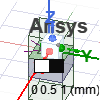

INFO 03:48PM [analyze]: Analyzing setup Setup



Number of eigenmodes to find             = 2
Number of simulation passes              = 40
Convergence freq max delta percent diff  = 0.1



In [22]:

draw_CPW()
# design.delete_component('Q1')
eig_res = EPRanalysis(design, "hfss")

hfss = eig_res.sim.renderer
hfss.start()

hfss.activate_ansys_design('readout','eigenmode')

hfss.render_design(['cpw_1','Q1','end'],[])
hfss.save_screenshot()

setup = hfss.pinfo.setup
setup.passes = 40
setup.min_converged = 9
setup.n_modes = 2

print(f"""
Number of eigenmodes to find             = {setup.n_modes}
Number of simulation passes              = {setup.passes}
Convergence freq max delta percent diff  = {setup.delta_f}
""")

# Next 2 lines are counterinuitive, since there is no junction in this resonator.
# However, these are necessary to make pyEPR work correctly. Please do note delete
hfss.pinfo.design.set_variable('Lj', '10 nH')
hfss.pinfo.design.set_variable('Cj', '0 fF')

setup.analyze()

In [23]:
eig_res.get_frequencies()

Design "readout" info:
	# eigenmodes    2
	# variations    1
Design "readout" info:
	# eigenmodes    2
	# variations    1


Freq. (GHz)  Quality Factor
variation mode                             
0         0        6.336721             inf
          1        7.000849             inf

In [24]:
eig_res.sim.convergence_t, eig_res.sim.convergence_f, _ = hfss.get_convergences()
eig_res.sim.plot_convergences()

03:56PM 47s INFO [get_f_convergence]: Saved convergences to c:\Users\slab\Desktop\Wendy-qiskit-code\hfss_eig_f_convergence.csv


03:56PM 51s WARNING [plot_ansys_fields]: This method is deprecated. Change your scripts to use plot_fields()


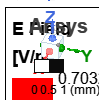

WindowsPath('c:/Users/slab/Desktop/Wendy-qiskit-code/ansys.png')

In [25]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_ansys_fields('main')
hfss.save_screenshot()

In [26]:
hfss.clear_fields(['Mag_E1'])

In [27]:
hfss.set_mode(2, "Setup")

INFO 03:57PM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.HfssEMSetup'>)


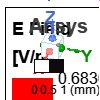

WindowsPath('c:/Users/slab/Desktop/Wendy-qiskit-code/ansys.png')

In [28]:
hfss.modeler._modeler.ShowWindow()
hfss.plot_fields('main')
hfss.save_screenshot()

In [29]:
eig_res.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'min_freq_ghz': 1,
 'n_modes': 1,
 'max_delta_f': 0.5,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'}}

In [30]:
eig_res.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': '',
   'line': ''}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [31]:
eig_res.setup.junctions.jj.rect = 'JJ_rect_Lj_Q1_rect_jj'
eig_res.setup.junctions.jj.line = 'JJ_Lj_Q1_rect_jj_'
eig_res.setup

{'junctions': {'jj': {'Lj_variable': 'Lj',
   'Cj_variable': 'Cj',
   'rect': 'JJ_rect_Lj_Q1_rect_jj',
   'line': 'JJ_Lj_Q1_rect_jj_'}},
 'dissipatives': {'dielectrics_bulk': ['main']},
 'cos_trunc': 8,
 'fock_trunc': 7,
 'sweep_variable': 'Lj'}

In [33]:
eig_res.run_epr()

Design "readout" info:
	# eigenmodes    2
	# variations    1
Design "readout" info:
	# eigenmodes    2
	# variations    1


  options=pd.Series(get_instance_vars(self.options)),




        energy_elec_all       = 1.30257249753934e-24
        energy_elec_substrate = 1.19677535080225e-24
        EPR of substrate = 91.9%

        energy_mag    = 9.23737451177308e-25
        energy_mag % of energy_elec_all  = 70.9%
        

Variation 0  [1/1]


  Ljs = pd.Series({})

  Cjs = pd.Series({})

  _Om = pd.Series({})




  Mode 0 at 6.34 GHz   [1/2]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               69.6%  7.452e-26 2.265e-26

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_0j   sign s_0j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 96.93%
	jj              0.391572  (+)        0.0124145
		(U_tot_cap-U_tot_ind)/mean=18.56%
Calculating Qdielectric_main for mode 0 (0/1)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_0 = 0.9208738470290613


  _Om = pd.Series({})




  Mode 1 at 7.00 GHz   [2/2]
    Calculating ℰ_magnetic,ℰ_electric


  Sj = pd.Series({})



       (ℰ_E-ℰ_H)/ℰ_E       ℰ_E       ℰ_H
               29.1%  6.513e-25 4.619e-25

    Calculating junction energy participation ration (EPR)
	method=`line_voltage`. First estimates:
	junction        EPR p_1j   sign s_1j    (p_capacitive)


  Qp = pd.Series({})



		Energy fraction (Lj over Lj&Cj)= 96.27%
	jj              0.163614  (+)        0.00633158
		(U_tot_cap-U_tot_ind)/mean=7.11%
Calculating Qdielectric_main for mode 1 (1/1)


  sol = sol.append(self.get_Qdielectric(



p_dielectric_main_1 = 0.9187783045189813


  options=pd.Series(get_instance_vars(self.options)),

WARNING 04:01PM [__init__]: <p>Error: <class 'IndexError'></p>
ERROR 04:01PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 37.1% is > 15%.                     
Is the simulation converged? Proceed with caution
ERROR 04:01PM [_get_participation_normalized]: WARNING: U_tot_cap-U_tot_ind / mean = 37.1% is > 15%.                     
Is the simulation converged? Proceed with caution
  result['Q_coupling'] = self.Qm_coupling[variation][self.Qm_coupling[variation].columns[junctions]][modes]#TODO change the columns to junctions

  result['Qs'] = self.Qs[variation][self.PM[variation].columns[junctions]][modes] #TODO change the columns to junctions




ANALYSIS DONE. Data saved to:

C:\data-pyEPR\Project14\readout\2023-02-01 16-01-42.npz


	 Differences in variations:



 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . 
Variation 0

Starting the diagonalization
Finished the diagonalization
Pm_norm=
modes
0    1.665299
1    1.508216
dtype: float64

Pm_norm idx =
     jj
0  True
1  True
*** P (participation matrix, not normlz.)
         jj
0  0.386770
1  0.162585

*** S (sign-bit matrix)
   s_jj
0    -1
1     1
*** P (participation matrix, normalized.)
      0.64
      0.25

*** Chi matrix O1 PT (MHz)
    Diag is anharmonicity, off diag is full cross-Kerr.
       127      107
       107     22.5

*** Chi matrix ND (MHz) 
       211     62.8
      62.8      6.5

*** Frequencies O1 PT (MHz)
0    6155.757442
1    6924.733448
dtype: float64

*** Frequencies ND (MHz)
0    6130.144212
1    6940.601897
dtype: float64

*** Q_coupling
Empty DataFrame
Columns: []
Index: [0, 1]


#### Mode frequencies (MHz)

###### Numerical diagonalization

Lj,10
0,6130.14
1,6940.60


#### Kerr Non-linear coefficient table (MHz)

###### Numerical diagonalization

0      1
Lj                 
10 0  211.11  62.83
   1   62.83   6.50

In [5]:
from tqdm import tqdm
import numpy as np
import time

In [8]:
for member in tqdm(np.linspace(0,100,100)):
    time.sleep(0.1)
    print(member)

  2%|▏         | 2/100 [00:00<00:10,  9.31it/s]

0.0
1.0101010101010102


  4%|▍         | 4/100 [00:00<00:10,  9.16it/s]

2.0202020202020203
3.0303030303030303


  6%|▌         | 6/100 [00:00<00:10,  9.10it/s]

4.040404040404041
5.050505050505051


  8%|▊         | 8/100 [00:00<00:10,  9.08it/s]

6.0606060606060606
7.070707070707071


 10%|█         | 10/100 [00:01<00:09,  9.08it/s]

8.080808080808081
9.090909090909092


 12%|█▏        | 12/100 [00:01<00:09,  9.05it/s]

10.101010101010102
11.111111111111112


 14%|█▍        | 14/100 [00:01<00:09,  9.05it/s]

12.121212121212121
13.131313131313131


 16%|█▌        | 16/100 [00:01<00:09,  9.03it/s]

14.141414141414142
15.151515151515152


 18%|█▊        | 18/100 [00:01<00:09,  8.98it/s]

16.161616161616163
17.171717171717173


 20%|██        | 20/100 [00:02<00:08,  9.00it/s]

18.181818181818183
19.191919191919194


 22%|██▏       | 22/100 [00:02<00:08,  9.03it/s]

20.202020202020204
21.212121212121215


 24%|██▍       | 24/100 [00:02<00:08,  9.03it/s]

22.222222222222225
23.232323232323235


 26%|██▌       | 26/100 [00:02<00:08,  9.05it/s]

24.242424242424242
25.252525252525253


 28%|██▊       | 28/100 [00:03<00:07,  9.01it/s]

26.262626262626263
27.272727272727273


 30%|███       | 30/100 [00:03<00:07,  9.06it/s]

28.282828282828284
29.292929292929294


 32%|███▏      | 32/100 [00:03<00:07,  9.01it/s]

30.303030303030305
31.313131313131315


 34%|███▍      | 34/100 [00:03<00:07,  9.02it/s]

32.323232323232325
33.333333333333336


 36%|███▌      | 36/100 [00:03<00:07,  9.08it/s]

34.343434343434346
35.35353535353536


 38%|███▊      | 38/100 [00:04<00:06,  9.07it/s]

36.36363636363637
37.37373737373738


 40%|████      | 40/100 [00:04<00:06,  9.04it/s]

38.38383838383839
39.3939393939394


 42%|████▏     | 42/100 [00:04<00:06,  9.04it/s]

40.40404040404041
41.41414141414142


 44%|████▍     | 44/100 [00:04<00:06,  9.06it/s]

42.42424242424243
43.43434343434344


 46%|████▌     | 46/100 [00:05<00:05,  9.09it/s]

44.44444444444445
45.45454545454546


 48%|████▊     | 48/100 [00:05<00:05,  9.11it/s]

46.46464646464647
47.47474747474748


 50%|█████     | 50/100 [00:05<00:05,  9.03it/s]

48.484848484848484
49.494949494949495


 52%|█████▏    | 52/100 [00:05<00:05,  9.04it/s]

50.505050505050505
51.515151515151516


 54%|█████▍    | 54/100 [00:05<00:05,  9.06it/s]

52.525252525252526
53.535353535353536


 56%|█████▌    | 56/100 [00:06<00:04,  8.99it/s]

54.54545454545455
55.55555555555556


 58%|█████▊    | 58/100 [00:06<00:04,  8.99it/s]

56.56565656565657
57.57575757575758


 60%|██████    | 60/100 [00:06<00:04,  8.98it/s]

58.58585858585859
59.5959595959596


 62%|██████▏   | 62/100 [00:06<00:04,  9.00it/s]

60.60606060606061
61.61616161616162


 64%|██████▍   | 64/100 [00:07<00:03,  9.05it/s]

62.62626262626263
63.63636363636364


 66%|██████▌   | 66/100 [00:07<00:03,  9.10it/s]

64.64646464646465
65.65656565656566


 68%|██████▊   | 68/100 [00:07<00:03,  9.09it/s]

66.66666666666667
67.67676767676768


 70%|███████   | 70/100 [00:07<00:03,  9.05it/s]

68.68686868686869
69.6969696969697


 72%|███████▏  | 72/100 [00:07<00:03,  9.00it/s]

70.70707070707071
71.71717171717172


 74%|███████▍  | 74/100 [00:08<00:02,  9.04it/s]

72.72727272727273
73.73737373737374


 76%|███████▌  | 76/100 [00:08<00:02,  9.04it/s]

74.74747474747475
75.75757575757576


 78%|███████▊  | 78/100 [00:08<00:02,  9.02it/s]

76.76767676767678
77.77777777777779


 80%|████████  | 80/100 [00:08<00:02,  9.05it/s]

78.7878787878788
79.7979797979798


 82%|████████▏ | 82/100 [00:09<00:01,  9.07it/s]

80.80808080808082
81.81818181818183


 84%|████████▍ | 84/100 [00:09<00:01,  9.05it/s]

82.82828282828284
83.83838383838385


 86%|████████▌ | 86/100 [00:09<00:01,  9.04it/s]

84.84848484848486
85.85858585858587


 88%|████████▊ | 88/100 [00:09<00:01,  9.01it/s]

86.86868686868688
87.87878787878789


 90%|█████████ | 90/100 [00:09<00:01,  8.99it/s]

88.8888888888889
89.89898989898991


 92%|█████████▏| 92/100 [00:10<00:00,  9.17it/s]

90.90909090909092
91.91919191919193


 94%|█████████▍| 94/100 [00:10<00:00,  9.18it/s]

92.92929292929294
93.93939393939395


 96%|█████████▌| 96/100 [00:10<00:00,  9.15it/s]

94.94949494949496
95.95959595959597


 98%|█████████▊| 98/100 [00:10<00:00,  9.08it/s]

96.96969696969697
97.97979797979798


100%|██████████| 100/100 [00:11<00:00,  9.06it/s]

98.98989898989899
100.0


## Save Design to GDS

In [18]:
a_gds = design.renderers.gds

In [19]:
a_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '100um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '200um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [20]:
a_gds.options['path_filename'] = 'Customized_Components\Fake_Junctions.GDS'

In [21]:

a_gds.options['short_segments_to_not_fillet'] = 'False'
a_gds.export_to_gds('One pad design.gds')

1

The rest of the notebook is just a scratch paper :D

In [130]:
q3d.clean_active_design()

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5,
 'max_delta_s': 0.1,
 'max_passes': 10,
 'min_passes': 1,
 'min_converged': 1,
 'pct_refinement': 30,
 'basis_order': 1,
 'vars': {'Lj': '10 nH', 'Cj': '0 fF'},
 'sweep_setup': {'name': 'Sweep',
  'start_ghz': 2.0,
  'stop_ghz': 8.0,
  'count': 101,
  'step_ghz': None,
  'type': 'Fast',
  'save_fields': False}}

In [51]:
import numpy as np
import scipy.linalg as la
import qutip as q
import astropy.units as u
import astropy.constants as con

class Single_Transmon_Circuit:
    ## Default constant
    eq = 1.602e-19*u.C 
    epsilon = con.eps0
    h = 6.636/10**34
    hbar = con.hbar
    kb = con.k_B
    Tc = 1.2
    delta = 1.764*kb*Tc
    phi0 = con.h/2/eq
    dielectric = 9.34*epsilon
    def __init__(self,cap_mat,pad_name,CPW_name,ground_plane_name = 'ground_main_plane') -> None:
        self.c_couple = -cap_mat[pad_name][CPW_name]*u.fF
        self.c_to_ground = cap_mat[pad_name][pad_name]
        self.c_CPW = cap_mat[CPW_name][CPW_name]

In [54]:
Single_Transmon_Circuit(c_mat,'pad_top_Q1','n_spiral_spiral')